# Extrapolation and interpolation with an analytic ideal gas model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from lib_extrap import *


## A 1D ideal gas in a linear external potential

Below we gain intuition for the analytical model included in the libExtrap package. Specifically, we have a system with $N$ ideal gas (IG) particles with a single dimension of length $L$. The potential energy for each particle is only a function of the particle location, $U(x) = ax$ where $x$ is the position of a particle along the single dimension. In what follows, $\beta=\frac{1}{k_{B}T}$ is the inverse temperature and we set the energy associated with particular position due to the external potential, $a$, equal to 1. This does not lose any generality as only values of $\beta$ or $L$ relative to $a$ matter.

<IPython.core.display.Javascript object>


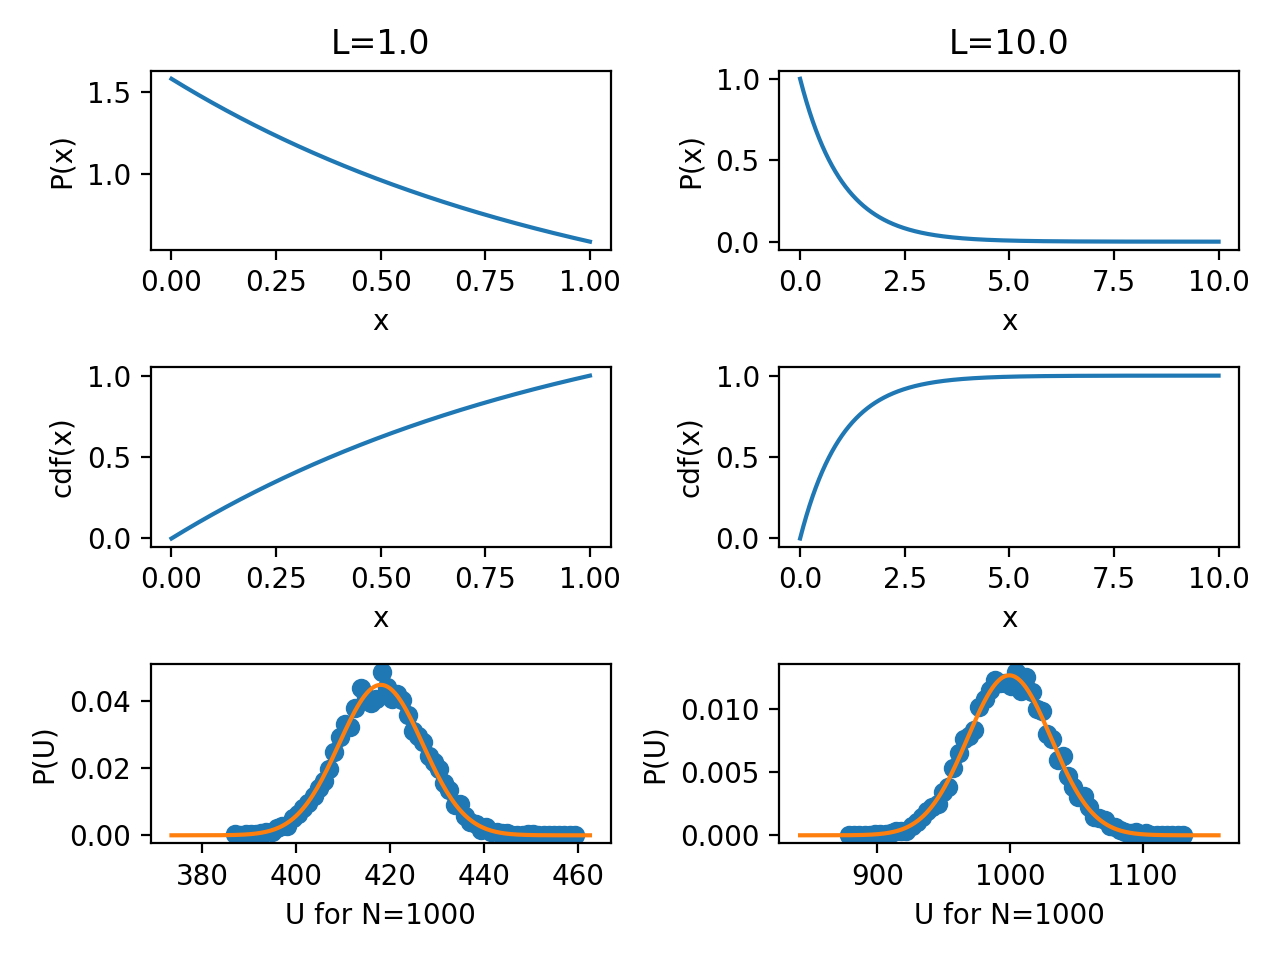

In [2]:
%matplotlib notebook

#Set up our IG model
mIG = IGmodel(nParticles=1000)

#And check some things out just with a test beta value, like 1.0 (just checking for right behavior)
testB = 1.0

#And at two different system sizes in its 1 dimension
#If L is not specified in the below functions, a default value of 1.0 is used
testL = [1.0, 10.0]

fig, ax = plt.subplots(3, 2)

for i, Lval in enumerate(testL):
    xvals = np.arange(0.0, Lval, 0.0001)

    #There are functions to sample both position and potential energy values
    uvals = mIG.sampleU(testB, s=10000, L=Lval)
    uhist, ubins = np.histogram(uvals, bins='auto', density=True)
    ubincents = 0.5*(ubins[:-1] + ubins[1:])
    
    #We can also just directly calculate the average or variance of the particle positions
    uavg = mIG.avgX(testB, L=Lval)*mIG.nP
    ustd = np.sqrt(mIG.varX(testB, L=Lval)*mIG.nP)
    utest = np.arange(uavg-5*ustd, uavg+5*ustd, 0.5)

    #Or you can get the probability distribution of x or U
    #For a full list of functions in the ideal gas model, just type help(mIG)
    ax[0,i].plot(xvals, mIG.PofX(xvals, testB, L=Lval))
    ax[1,i].plot(xvals, mIG.cdfX(xvals, testB, L=Lval))
    ax[2,i].plot(ubincents, uhist, 'o')
    ax[2,i].plot(utest, mIG.PofU(utest, testB, L=Lval))

    ax[0,i].set_xlabel('x')
    ax[0,i].set_ylabel('P(x)')
    ax[1,i].set_xlabel('x')
    ax[1,i].set_ylabel('cdf(x)')
    ax[2,i].set_xlabel('U for N=%s'%mIG.nP)
    ax[2,i].set_ylabel('P(U)')

ax[0,0].set_title('L=%2.1f'%testL[0])
ax[0,1].set_title('L=%2.1f'%testL[1])

fig.tight_layout()

plt.show()


The probability of a particle residing at a particular location is $\frac{e^{-\beta a x}}{\int_0^L e^{-\beta a x} dx}$, shown in the top panel. The cumulative distribution function, which is used to randomly sample from the distribution $P(x)$, is shown in the middle. From $N$ random draws of $x$ distributed according to $P(x)$, you have a single configuration with $N$ particles. The potential energy for a single configuration is $a \sum_i x_i$ and so by randomly sampling many configuraitons, we construct the potential energy distribution in the bottom panel. For a single particle, the potential energy distribution is identical to $P(x)$ since a single $x$ maps to exactly one potential energy. For many particles, however, the potential energy is a random variable composed of a sum of idependent random variables and so the distribution is Gaussian, as confirmed by the bottom panel.

<IPython.core.display.Javascript object>


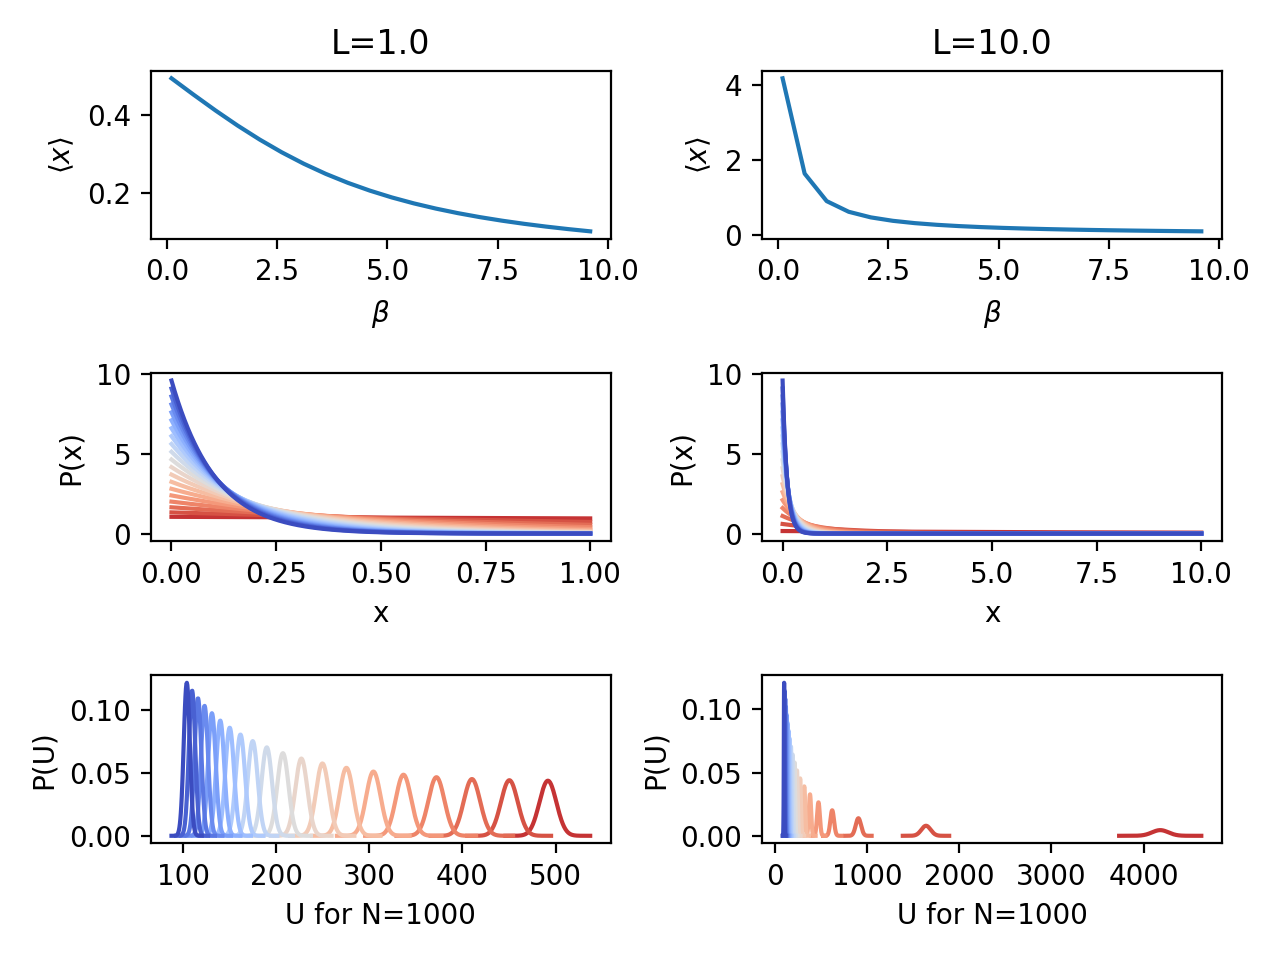

In [3]:
#Now look at behavior as a function of inverse temperature (at the same system sizes as above)

betavals = np.arange(0.1, 10.0, 0.5)

bcolors = plt.cm.coolwarm(np.arange(0.0, 1.0, float(1.0/len(betavals))))

fig, ax = plt.subplots(3, 2)

for i, Lval in enumerate(testL):
    xvals = np.arange(0.0, Lval, 0.0001)
    ax[0,i].plot(betavals, mIG.avgX(betavals, L=Lval))

    for j, B in enumerate(betavals):
        ax[1,i].plot(xvals, mIG.PofX(xvals, B, L=Lval), color=bcolors[-(j+1)])
        thisavg = mIG.nP*mIG.avgX(B, L=Lval)
        thisstd = np.sqrt(mIG.nP*mIG.varX(B, L=Lval))
        thisu = np.arange(thisavg-5*thisstd, thisavg+5*thisstd, 0.5)
        ax[2,i].plot(thisu, mIG.PofU(thisu, B, L=Lval), color=bcolors[-(j+1)])
    
    ax[0,i].set_xlabel(r'$\beta$')
    ax[0,i].set_ylabel(r'$\langle x \rangle$')
    ax[1,i].set_xlabel('x')
    ax[1,i].set_ylabel('P(x)')
    ax[2,i].set_xlabel('U for N=%s'%mIG.nP)
    ax[2,i].set_ylabel('P(U)')

ax[0,0].set_title('L=%2.1f'%testL[0])
ax[0,1].set_title('L=%2.1f'%testL[1])

fig.tight_layout()

plt.show()


A simple structural property of interest is the average $x$ value, which is plotted in the top panel as a function of $\beta$. It's only non-linear over a very large temperature range, but it's a toy system so the physical temperature really isn't relevant anyway. Changes in $P(x)$ and $P(U)$ with temperature are shown as well with coloring by temperature, NOT inverse temperature (blue is the lowest $T$, highest $\beta$). Clearly the configurational distributions will not overlap in their important regions and neither will the potential energy distributions, meaning perturbation won't work at some point. This is especially true as $L$ is increased.

Below, we show $\langle x \rangle$ as a function of $L$ at various temperatures. Non-linearities arise at all temperatures to varying degrees.

<IPython.core.display.Javascript object>


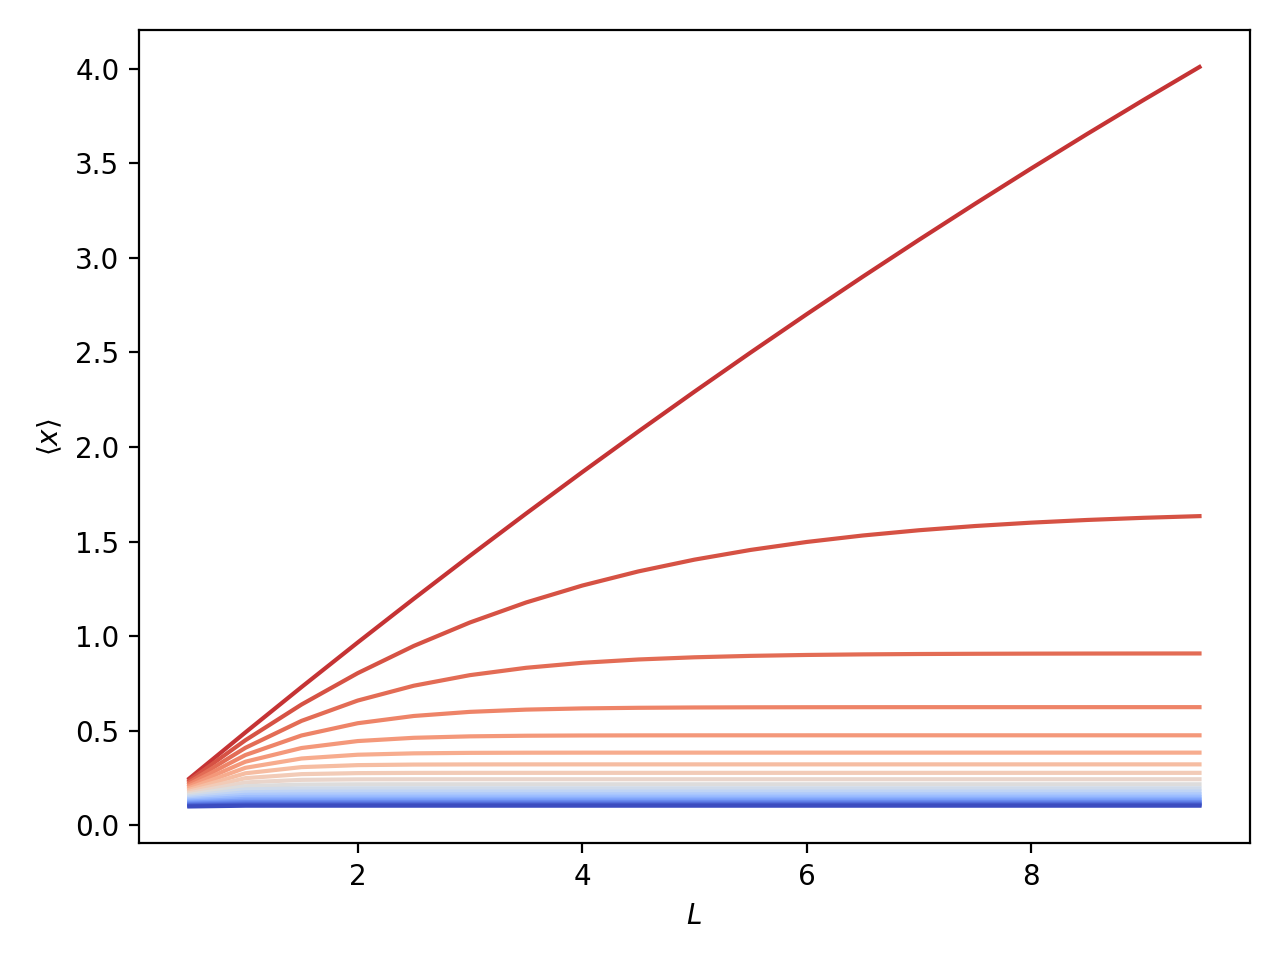

In [4]:
#Behavior of average x as a function of L

fig, ax = plt.subplots()

lvals = np.arange(0.5, 10.0, 0.5)

for i, B in enumerate(betavals):
    ax.plot(lvals, mIG.avgX(B, L=lvals), color=bcolors[-(i+1)], label=r'$\beta$ = %2.1f'%B)

ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\langle x \rangle$')

fig.tight_layout()

plt.show()


## Extrapolation in temperature

### Case 1: Observable is an average with no explicit dependence on temperature

We first extrapolate the analytical model in temperature and compare to the exact result. We also compare results with finite numbers of samples to exact results for an infinite number of samples. This is possible because we can analytically calculate derivatives for the ideal gas model at any order rather than estimating them.

The first thing we want to do is define some parameters and generate data. We will define a reference inverse temperature, specific orders we want to extrapolate to, and create some reference data. The `genData` function of the `IGModel` class conveniently provides random samples of $x$ and $U$ data. This will be in the format of an array with `nConfigs` elements, each being the average $x$ value over $N$ independent ideal gas particles. The relevant potential energy is an array of the same shape with a single entry for each configuration. More generally, the data that should be provided to the extrapolation/interpolation code can have any number of columns but should have a single row associated with each simulation snapshot and potential energy. This allows for simultaneous extrapolation of all points in RDFs or time correlation functions with the interparticle distance or time varying with column. Or for simultaneous extrapolation of multiple observables. Critical, however, is that the potential energy (or Hamiltonian) is that which is appropriate to the snapshot with the same index. So for dynamical quantities like time correlation functions, the appropriate Hamiltonian is that for the starting configuration. Another main point here is that the number of columns is arbitrary, with each extrapolated separately, but because of the way the code is vectorized you get much better efficiency by providing multiple columns rather than running the extrapolation multiple times for different observables.

In [5]:
#Compare both perturbation and extrapolation in temperature to their analytical results

#Define reference beta
refBeta = betavals[11]

#Define orders to extrapolate to
extOrders = [1,2,4,6]

#Generate all the data we could want
xdata, udata = mIG.genData(refBeta, nConfigs=100000)


We now want to create and train our extrapolation and perturbation models that we will compare. By default the `ExtrapModel` or other classes work with the simplest case of directly extrapolating an observable that is an average quantity and does not explicitly depend on temperature. Note that this covers quantities that include dependence on kinetic degrees of freedom, with the potential energy simply substituted for the full Hamiltonian (total energy). Or it works for extrapolating in temperature or pressure in the NPT ensemble - again you just have to insert the appropriate Hamiltonian instead of the potential energy. We will handle the case of explicit temperature dependence later on.

In [6]:
#Create extrapolation and perturbation models
extModel = ExtrapModel(maxOrder=extOrders[-1])
pertModel = PerturbModel()

#Train on the full dataset
extParams = extModel.train(refB=refBeta, xData=xdata, uData=udata, saveParams=True)
pertParams = pertModel.train(refB=refBeta, xData=xdata, uData=udata, saveParams=True)


In the above, we first create the objects, then train them. If you instead pass all but the `saveParams` argument when creating the models, they will automatically train themselves on the data provided. During initiation of extrapolation models, sympy is used to calculate all symbolic derivatives up to the desired order. Going to higher orders is really the time consuming bit, so we try and do it as few times as possible. This is not needed for perturbation as there is no sense of truncating at a certain order.

The `train` function returns the parameters. For extrapolation, these are the numerical values of the derivatives up to the specified maximum order for each element of a vector observable. For perturbation, the parameters are just the data itself, as all of it is needed to make a calculation through reweighting. The `saveParams` argument tells whether or not the class should make the calculated parameters the default for that object. Typically, you want this to be the case so that you can then just use the object to make predictions (shown next). You'll want to set this to `False`, however, if you just want to make a one-off parameter estimate or prediction with a subset of the data or altered dataset, as is the case when bootstrapping.

Let's test some predictions and look at the results. Notice that you can make predictions over scalars or arrays of values, but the extrapolation will only be 1D in the variable of interest (e.g. temperature, pressure, etc.). Extrapolations in multiple dimensions of state variables is not yet supported.

In [7]:
#Make some predictions
print(extModel.predict(betavals[0]))
print(pertModel.predict(betavals[0]))
print('\n')

#By default, uses maximum order, but can switch to any lower order if desired
#Remember, order doesn't matter for perturbation
print(extModel.predict(betavals[0], order=2))
print(pertModel.predict(betavals[0]))
print('\n')

#Can also make predictions for multiple values
print(extModel.predict(betavals[:4], order=2))
print(pertModel.predict(betavals[:4]))
print('\n')

#When making predictions, can also take parameters instead of using those saved by saveParams=True
print(extModel.predict(betavals[0], order=2, params=extParams))
print(pertModel.predict(betavals[0], params=pertParams))


[[-357.34952703]]
[[0.19712031]]


[[0.43293531]]
[[0.19712031]]


[[0.43293531]
 [0.40094202]
 [0.37065495]
 [0.34207409]]
[[0.19712031]
 [0.1971048 ]
 [0.19708687]
 [0.1970659 ]]


[[0.43293531]]
[[0.19712031]]


Note that the output shape has its first dimension as the length of the array of values at which we want predictions and its second dimension being the length of the observable array. This is more clear if we add an extra dimension to our data...

In [8]:
#Create and train extrapolation model with 2D data
extModel2D = ExtrapModel(maxOrder=extOrders[-1], refB=refBeta, xData=np.array([xdata, xdata**2]).T, uData=udata)

#Check the parameters - should be same for first dimension
print(extParams)
print(extModel2D.params)
print('\n')

#Finally, look at predictions
print(extModel2D.predict(betavals[:4], order=2))


[[ 1.74851029e-01]
 [-2.81560336e-02]
 [ 6.82486586e-03]
 [-1.10338081e-03]
 [-9.80907381e-02]
 [ 6.94496155e-01]
 [-8.45214844e+00]]
[[ 1.74851029e-01  3.06010385e-02]
 [-2.81560336e-02 -9.85304777e-03]
 [ 6.82486586e-03  3.97329747e-03]
 [-1.10338081e-03 -1.44073181e-03]
 [-9.80907381e-02 -3.44678797e-02]
 [ 6.94496155e-01  2.77276039e-01]
 [-8.45214844e+00 -3.32153320e+00]]


[[0.43293531 0.14488893]
 [0.40094202 0.1295325 ]
 [0.37065495 0.11516939]
 [0.34207409 0.10179961]]


All of the extrapolation/interpolation model classes come with a bootstrap function that will resample the passed in data and return the standard deviation of the bootstrapped estimates (default resamples is $n=100$). Each time a data sample is drawn, the parameters are recomputed (i.e. model is retrained) but not saved and the resulting parameters are used to evaluate the model at the specified state points. Passing in no values at which to make predictions will instead return boostrapped estimates of the error in the parameters themselves (i.e. derivatives for extrapolation or polynomial coefficients for interpolation). Uncertainty estimates are returned with the same shapes as predictions themselves. When estimating the uncertainty in parameters, the dimensions are the derivative (or polynomial) order and the observable vector.

In [9]:
#Get bootstrapped error at a series of data points at a specified order with 1000 draws from the original data
print(extModel2D.bootstrap(betavals[:4], order=2, n=1000))
print('\n')

#Now get bootstrapped uncertainty in the parameters up to maximum order with only 100 draws (the default)
print(extModel2D.bootstrap([]))


[[0.01740954 0.00614397]
 [0.01439407 0.00508101]
 [0.01166542 0.00411902]
 [0.00922358 0.00325801]]


No state points provided to boostrap prediction at - bootstrapping parameters.
[[1.59766469e-05 5.60184155e-06]
 [1.11921824e-04 3.91327805e-05]
 [1.10343030e-03 3.85729843e-04]
 [1.17410648e-02 4.15561803e-03]
 [1.55377386e-01 5.51661202e-02]
 [1.53058300e+00 5.46730876e-01]
 [2.31307611e+01 8.00727751e+00]]


It's finally time to do something interesting. Now we will loop over different numbers of samples (in sets randomly drawn from the data we generated earlier) and extrapolation orders and compare the performance of extrapolation and perturbation to the analytical result.

<IPython.core.display.Javascript object>


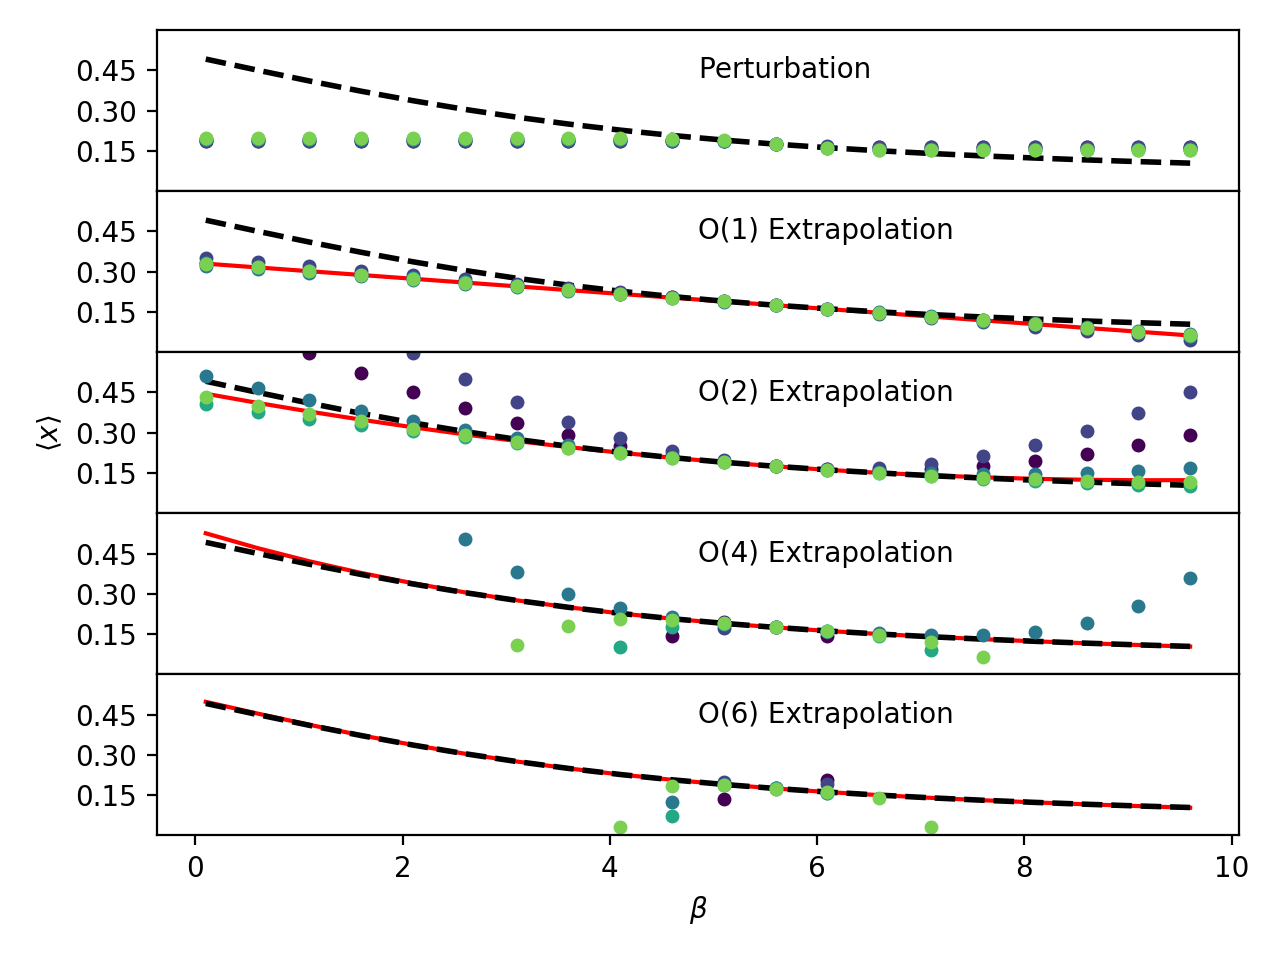

True extrapolation coefficients: [ 0.17485984 -0.02816239  0.00763547 -0.00229234  0.00043704  0.00025699
 -0.0004418 ]
	 With N_configs =     10: [ 1.75135646e-01 -2.85314761e-02  2.90352305e-02 -5.43823461e-01
 -4.02674288e+00  2.32438782e+02  7.08955078e+01]
	 With N_configs =    100: [ 1.75085835e-01 -3.20268052e-02  5.05401401e-02  4.24647533e-01
 -6.79104242e+00  1.18483467e+01  1.50019043e+03]
	 With N_configs =   1000: [ 1.74735847e-01 -2.69201708e-02  1.24634193e-02 -1.69860491e-02
  3.48271728e-02 -6.87944794e+00 -1.03341797e+02]
	 With N_configs =  10000: [ 1.74904582e-01 -2.84640495e-02  4.92313994e-03  6.59971781e-02
 -4.03301626e-01 -3.73431015e+00 -9.78505859e+01]
	 With N_configs = 100000: [ 1.74851029e-01 -2.81560336e-02  6.82486586e-03 -1.10338046e-03
 -9.80891287e-02  6.95240021e-01 -8.23046875e+00]


In [10]:
fig, ax = plt.subplots(len(extOrders)+1, sharex=True, sharey=True)

nsampvals = np.array((10.0*np.ones(5))**np.arange(1,6), dtype=int)
nsampcolors = plt.cm.viridis(np.arange(0.0, 1.0, float(1.0/len(nsampvals))))

#First plot the analytical result
for a in ax:
    a.plot(betavals, mIG.avgX(betavals), 'k--', linewidth=2.0)

#Next look at extrapolation with an infinite number of samples
#This is possible in the ideal gas model in both temperature and volume
for j, o in enumerate(extOrders):
    trueExtrap, trueDerivs = mIG.extrapAnalytic(betavals, refBeta, o)
    ax[j+1].plot(betavals, trueExtrap, 'r-', zorder=0)
    if j == len(extOrders)-1:
        print('True extrapolation coefficients: %s'%str(trueDerivs))

for i, n in enumerate(nsampvals):
    thisinds = np.random.choice(len(xdata), size=n, replace=False)
    
    #Get parameters for extrapolation model with this data by training it - the parameters are the derivatives
    thisext = extModel.train(refBeta, xdata[thisinds], udata[thisinds], saveParams=False)
    print('\t With N_configs = %6i: %s'%(n, str(thisext.flatten()))) #Have to flatten because observable is 1-D
    for j, o in enumerate(extOrders):
        dataExtrap = extModel.predict(betavals, params=thisext, order=o)
        ax[j+1].plot(betavals, dataExtrap, 'o', markersize=4, color=nsampcolors[i], label='N=%i'%n)
    
    #And do the same thing for perturbation, but here the parameters are just the data
    thispert = pertModel.train(refBeta, xdata[thisinds], udata[thisinds], saveParams=False)
    dataPert = pertModel.predict(betavals, params=thispert)
    ax[0].plot(betavals, dataPert, 'o', markersize=4, color=nsampcolors[i])

ax[2].set_ylabel(r'$\langle x \rangle$')
ax[-1].set_xlabel(r'$\beta$')

ax[0].annotate('Perturbation', xy=(0.5, 0.7), xycoords='axes fraction')
for j, o in enumerate(extOrders):
    ax[j+1].annotate('O(%i) Extrapolation'%(o), xy=(0.5, 0.7), xycoords='axes fraction')

ax[-1].set_ylim((0.0, 0.6))
ax[-1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=4, prune='both'))

fig.tight_layout()
fig.subplots_adjust(hspace=0.0)

plt.show()


In each of the figures, the true behavior is shown as a black dashed line, the analytical result (infinite sampling) for each order of extrapolation is shown as a red solid line and the results with 10, 100, 1000, ... 100000 randomly sampled configurations are shown with purple (fewer samples) to green (more samples) circles. Perturbation works close to the reference temperature, but saturates far away. With more samples, it works further out, but the increases in accuracy are marginal. First order extrapolation quickly converges to the infinite sampling limit while second order takes more sampling to do so. The actual coefficients at each order of extrapolation are printed below. Since perturbation essentially refuses to provide an estimate past a certain distance in $\beta$, it is not reliable some distance out. Both first and second order extrapolation essentially get lucky here and remain highly accurate over very large temperature ranges. For higher order extrapolation, the analytical, infinite sampling result matches very closely with the true temperature dependence of $\langle x \rangle$. However, the finite-sampling results are in practice very poor due to difficulties in accurately estimating the higher-order moments of the potential energy distribution. The higher orders are actually quite accurate (if you try zooming in) close to the point we're extrapolating from, but the error grows very quickly as we move further away.

To get a sense for when/why perturbaiton fails, we can look at ratios of probability distributions.

<IPython.core.display.Javascript object>


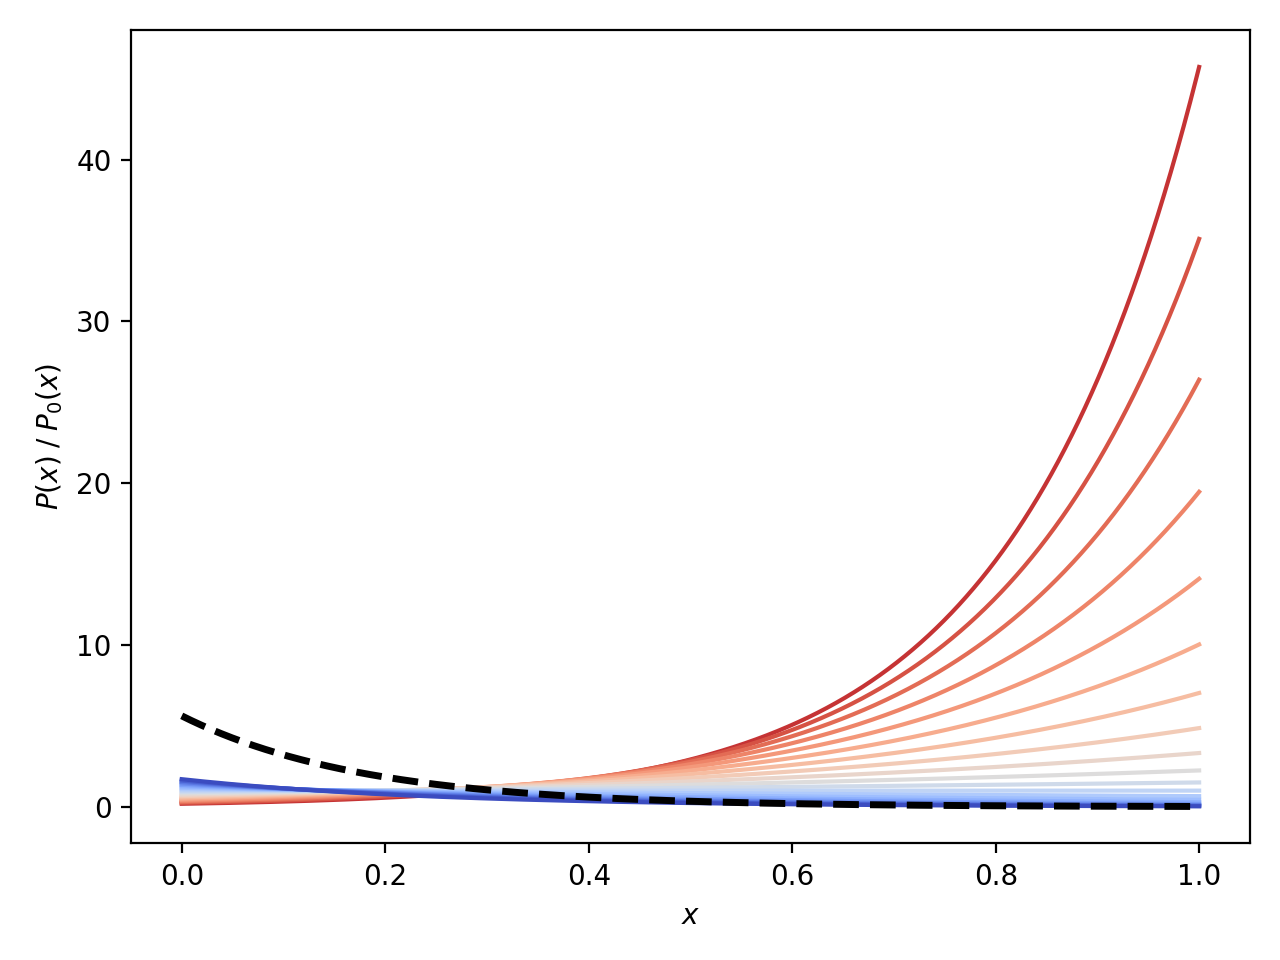

In [11]:
fig, ax = plt.subplots()

xvals = np.arange(0.0, 1.0, 0.0001)

for i, B in enumerate(betavals):
    ax.plot(xvals, mIG.PofX(xvals, B)/mIG.PofX(xvals, refBeta), color=bcolors[-(i+1)])

ax.plot(xvals, mIG.PofX(xvals, refBeta), 'k--', linewidth=2.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$P(x) \; / \; P_{0}(x)$')

fig.tight_layout()

plt.show()


The above shows the ratio of probabilities at the perturbed temperature to the reference temperature and gives a better sense for why perturbation fails. Where the ratio of weights is large is where we need to sample because this is the part of phase space that is important to the state we're perturbing to that is not sampled in the reference state. It's also where the ratio of weights itself will contribute the most to its average. This is critical because perturbation relies on accurately computing both the average of the quantity of interest multiplied by the weight ratio (the numerator) and the weight ratio itself (the denominator). If we compare to the reference $P(x)$ (shown as a dashed line), we see that where we actually sample configurations from is nowhere close to what's important in the ratio of weights. Perturbation is then the same as only averaging (integrating) the ratio up to a certain point, limited by sampling. By truncating at that point, you don't get a good estimate of the true average of the ratio of weights. You also can't possibly get a good estimate of the numerator in perturbation, which is the average of the quantity of interest multiplied by the ratio of weights. Perturbation effectively tries to compensate for sampling from the wrong region by multiplying the observable of interest by the ratio of weights when averaging. This still won't be enough because you can't accurately estimate the ratio of weights if you don't sample fully. The end result is that you just get stuck with configurations only relevant to the reference ensemble and your estimate won't change even as you move further away.

### Case 2: Observable is an average with explicit temperature dependence

This is a more difficult case because the derivatives are more complicated. However, this case has also been coded in the library. Modifications do need to be made to the base classes, but this is relatively easy to do and will also be the basis for extrapolating quantities that involve natural logarithms or extrapolating in volume.

The extrapolation and interpolation model classes all have methods called `calcDerivFuncs` and `calcDerivVals` (the MBAR and perturbation classes do not, obviously). The first of these functions typically calculates symbolic derivatives to the desired order and returns "lambdified" numpy functions. These functions take as input moments of the potential energy and observable used in extrapolation and output derivatives at a specific order. What's more important is the `calcDerivVals` function because it takes raw data and uses this, along with the results of `calcDerivFuncs`, to calculate and return actual derivative values. We must change both of these functions in order to incorporate temperature dependence. In what is below, we only need to change a one or two lines in each of these functions because methods to calculate symbolic derivatives and appropriate potential energy moments have already been coded.

In [12]:
class ExtrapModelDependent(ExtrapModel):
    """Class to hold information about an extrapolation that is dependent on the extrapolation variable.
    """

    #Calculates symbolic derivatives up to maximum order given data
    #Returns list of functions that can be used to evaluate derivatives for specific data
    def calcDerivFuncs(self):
        derivs = []
        for o in range(self.maxOrder+1):
            derivs.append(symDerivAvgXdependent(o)) #Only changing this line to get dependent information
        return derivs

    #And given data, calculate numerical values of derivatives up to maximum order
    #Will be very helpful when generalize to different extrapolation techniques
    #(and interpolation)
    def calcDerivVals(self, refB, x, U):
        """Calculates specific derivative values at B with data x and U up to max order.
        Returns these derivatives.
        """
        if x.shape[0] != U.shape[0]:
            print('First observable dimension (%i) and size of potential energy array (%i) don\'t match!'%(x.shape[0], U.shape[0]))
            return
        
        avgUfunc, avgXUfunc = buildAvgFuncsDependent(x, U, self.maxOrder) #Change this line to use dependent function
        derivVals = np.zeros((self.maxOrder+1, x.shape[2])) #And change this line because x data is of different shape
        for o in range(self.maxOrder+1):
            derivVals[o] = self.derivF[o](avgUfunc, avgXUfunc)
            
        return derivVals


For our observable that depends explicitly on temperature, we select the average dimensionless potential energy of a single ideal gas particle, $\beta u = \langle \beta a x \rangle = \langle \beta x \rangle$ where $a=1$ for simplicity. The average is over all particles and configurations. 

Everything can be set up in pretty much the same way. EXCEPT that we now have to provide not only data for the observable, but also its derivatives in $\beta$. The derivatives must be supplied up to the desired maximum order. This is a bit cumbersome in general, but it is rare to have explicit temperature dependence except polynomial or exponential dependence on $\beta$, as in the case when computing excess chemical potentials. In these cases, derivatives of arbitrarily high order are trival to compute. 

So now the observable data can have 3 dimensions - for each configurational snapshot, for each derivative order starting at zero (i.e. the observable value) and going to the maximum desired, and for each element in the observable array.  

In [13]:
#Make sure to include observable derivatives with beta
xdataDepend = np.array([xdata*refBeta, xdata]).T
xdataDepend = np.hstack((xdataDepend, np.zeros((xdata.shape[0],5))))
xdataDepend = np.reshape(xdataDepend, xdataDepend.shape+(1,))

#Create and train extrapolation model
extModelDependent = ExtrapModelDependent(maxOrder=extOrders[-1], refB=refBeta, xData=xdataDepend, uData=udata)

#Check the parameters
print(extModelDependent.params)
print('\n')

#Finally, look at predictions
print(extModelDependent.predict(betavals[:4], order=2))
print('\n')

#And bootstrapped uncertainties
print(extModelDependent.bootstrap(betavals[:4], order=2))


[[ 9.79165764e-01]
 [ 1.71772413e-02]
 [-1.80928183e-02]
 [ 1.42956621e-02]
 [-5.53719560e-01]
 [ 3.39604962e+00]
 [-4.48944092e+01]]


[[0.61103706]
 [0.66711933]
 [0.71867839]
 [0.76571425]]


[[0.09282939]
 [0.07668277]
 [0.06207892]
 [0.04901783]]


<IPython.core.display.Javascript object>


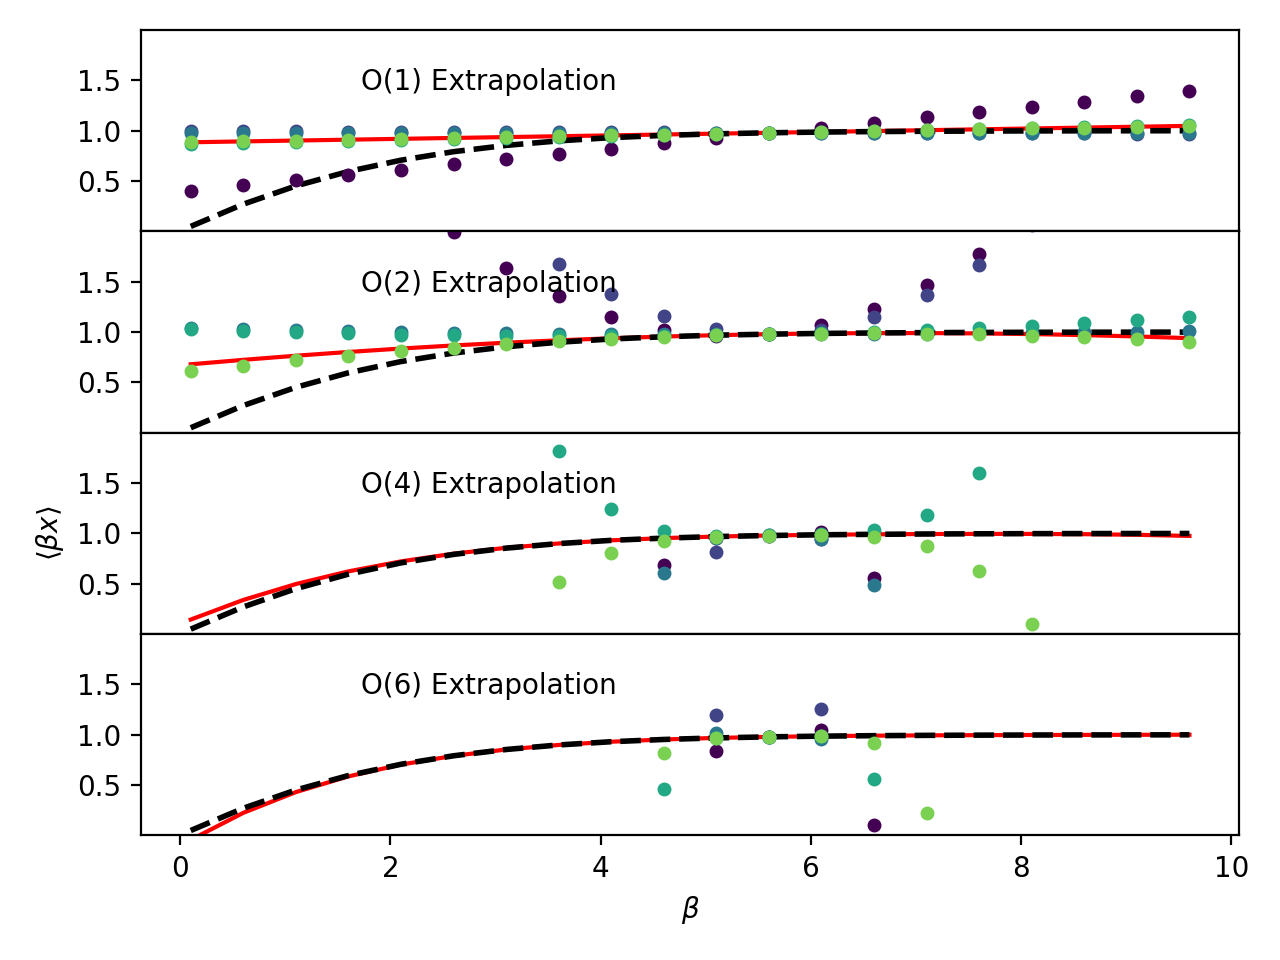

True extrapolation coefficients: [ 9.79215103e-01  1.71504528e-02 -1.35661750e-02  1.00692980e-02
 -6.72191329e-03  3.62437174e-03 -9.32132566e-04]
	 With N_configs =     10: [ 9.76968781e-01  1.04197666e-01  2.94751556e-01 -9.93429288e-01
 -1.20388569e+01  2.80891689e+02 -2.01314270e+03]
	 With N_configs =    100: [ 9.80656043e-01 -2.49843691e-03  3.47041667e-01  3.36054948e+00
 -5.52828278e+01 -1.41151696e+02  1.58788598e+04]
	 With N_configs =   1000: [ 9.77651788e-01  3.48339992e-04  4.05494324e-03 -3.54019225e-01
 -1.04022731e+01 -7.53763306e+01  1.70478079e+03]
	 With N_configs =  10000: [ 9.79251222e-01  2.04481180e-02  1.10477671e-02 -1.09912944e-01
  1.06089062e+00  6.04937458e+00 -3.73422150e+02]
	 With N_configs = 100000: [ 9.79165764e-01  1.71772413e-02 -1.80928183e-02  1.42956667e-02
 -5.53720394e-01  3.39525640e+00 -5.46756897e+01]


In [14]:
fig, ax = plt.subplots(len(extOrders), sharex=True, sharey=True)

nsampvals = np.array((10.0*np.ones(5))**np.arange(1,6), dtype=int)
nsampcolors = plt.cm.viridis(np.arange(0.0, 1.0, float(1.0/len(nsampvals))))

#First plot the analytical result
for a in ax:
    a.plot(betavals, betavals*mIG.avgX(betavals), 'k--', linewidth=2.0)

#And the infinite sampling results for each extrapolation order
#Hard-coding analytic extrapolation for the specific case of <B*x> here because it's simple and nice to check
trueDerivs = np.zeros(np.max(extOrders)+1)
for o in range(np.max(extOrders)+1):
    if o == 0:
        trueDerivs[o] = (refBeta*(mIG.avgX(refBeta)))
        continue
    trueDerivs[o] = (o*mIG.avgXsym.diff(mIG.b, o-1).subs({mIG.b:refBeta, mIG.l:1.0})
                     + refBeta*mIG.avgXsym.diff(mIG.b, o).subs({mIG.b:refBeta, mIG.l:1.0}))
print('True extrapolation coefficients: %s'%str(trueDerivs))

#Now need to loop to get actual extrapolation values with analytical derivatives
for j, o in enumerate(extOrders):
    trueExtrap = 0.0
    for k in range(o+1):
        trueExtrap += trueDerivs[k]*((betavals-refBeta)**k)/np.math.factorial(k)
    ax[j].plot(betavals, trueExtrap, 'r-', zorder=0)

for i, n in enumerate(nsampvals):
    thisinds = np.random.choice(len(xdata), size=n, replace=False)
    
    #Get parameters for extrapolation model with this data by training it - the parameters are the derivatives
    thisext = extModelDependent.train(refBeta, xdataDepend[thisinds], udata[thisinds], saveParams=False)
    print('\t With N_configs = %6i: %s'%(n, str(thisext.flatten()))) #Have to flatten because observable is 1-D
    for j, o in enumerate(extOrders):
        dataExtrap = extModelDependent.predict(betavals, params=thisext, order=o)
        ax[j].plot(betavals, dataExtrap, 'o', markersize=4, color=nsampcolors[i], label='N=%i'%n)

ax[2].set_ylabel(r'$\langle \beta x \rangle$')
ax[-1].set_xlabel(r'$\beta$')

for j, o in enumerate(extOrders):
    ax[j].annotate('O(%i) Extrapolation'%(o), xy=(0.2, 0.7), xycoords='axes fraction')

ax[-1].set_ylim((0.0, 2.0))
ax[-1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=4, prune='both'))

fig.tight_layout()
fig.subplots_adjust(hspace=0.0)

plt.show()


### Case 3: Observable is the negative logarithm of an average with no explicit temperature dependence

Modifications for this case will be very similar to those in the case of an average with explicit temperature dependence. We only need to modify `calcDerivVals` this time because we want the same symbolic derivatives, we will just combine them in a different way that reflects a generalization of the chain rule (i.e. Fa\`{a} di Bruno's formula applied to the logarithm of a function).

In [15]:
#For quantities like the chemical potential, we're interested in the -log(<X>), not <X>
#Everything is the same, but we take derivatives differently
#Luckily, have closed-form expression for derivatives of -log(<X>) in terms of derivatives of <X>
#Specifically, d(n)[-log(<X>)]/dB(n) = Sum(k=1, n)[(k-1)! * (-1/<X>)^k * B(n,k,(d<X>/dB, ..., d(n-k+1)<X>/dB(n-k+1)))]
#B(n,k, (...)) represents Bell Polynomials, which are implemented in sympy (not numpy or scipy unfortunately)
#Create custom classes to handle this
from sympy import bell

class LogAvgExtrapModel(ExtrapModel):
    
    def calcDerivVals(self, refB, x, U):
        
        if x.shape[0] != U.shape[0]:
            print('First observable dimension (%i) and size of potential energy array (%i) do not match!'%(x.shape[0], U.shape[0]))
            return
    
        avgUfunc, avgXUfunc = buildAvgFuncs(x, U, self.maxOrder)
        derivVals = np.zeros((self.maxOrder+1, x.shape[1]))
        for o in range(self.maxOrder+1):
            if o == 0:
                derivVals[o] = (-np.log(avgXUfunc(0)))
                continue
            for k in range(1,o+1):
                #Get the derivatives of the average quantity
                thisDiffs = np.array([self.derivF[l](avgUfunc, avgXUfunc) for l in range(1, o-k+2)])
                #Loop to apply the chain rule to each element of the observable array
                for l in range(x.shape[1]):
                    derivVals[o,l] += np.math.factorial(k-1)*((-1/avgXUfunc(0)[l])**k)*bell(o, k, thisDiffs[:,l])
                
        return derivVals


In [16]:
#Create and train extrapolation model
extModelLog = LogAvgExtrapModel(maxOrder=extOrders[-1], refB=refBeta, xData=xdata, uData=udata)

#Note that we handled the -log calculation in the definition of the derivatives (even at zeroth order).
#This means we want to just pass data, not the -log of the data.

#Check the parameters
print(extModelLog.params)
print('\n')

#Finally, look at predictions
print(extModelLog.predict(betavals[:4], order=2))
print('\n')

#And bootstrapped uncertainties
print(extModelLog.bootstrap(betavals[:4], order=2))


[[ 1.74382093e+00]
 [ 1.61028698e-01]
 [-1.31022188e-02]
 [-4.19460770e-03]
 [ 5.61520093e-01]
 [-3.51925911e+00]
 [ 4.46098457e+01]]


[[0.65999203]
 [0.7748997 ]
 [0.88653182]
 [0.99488839]]


[[0.08951729]
 [0.07404229]
 [0.06003613]
 [0.0474988 ]]


<IPython.core.display.Javascript object>


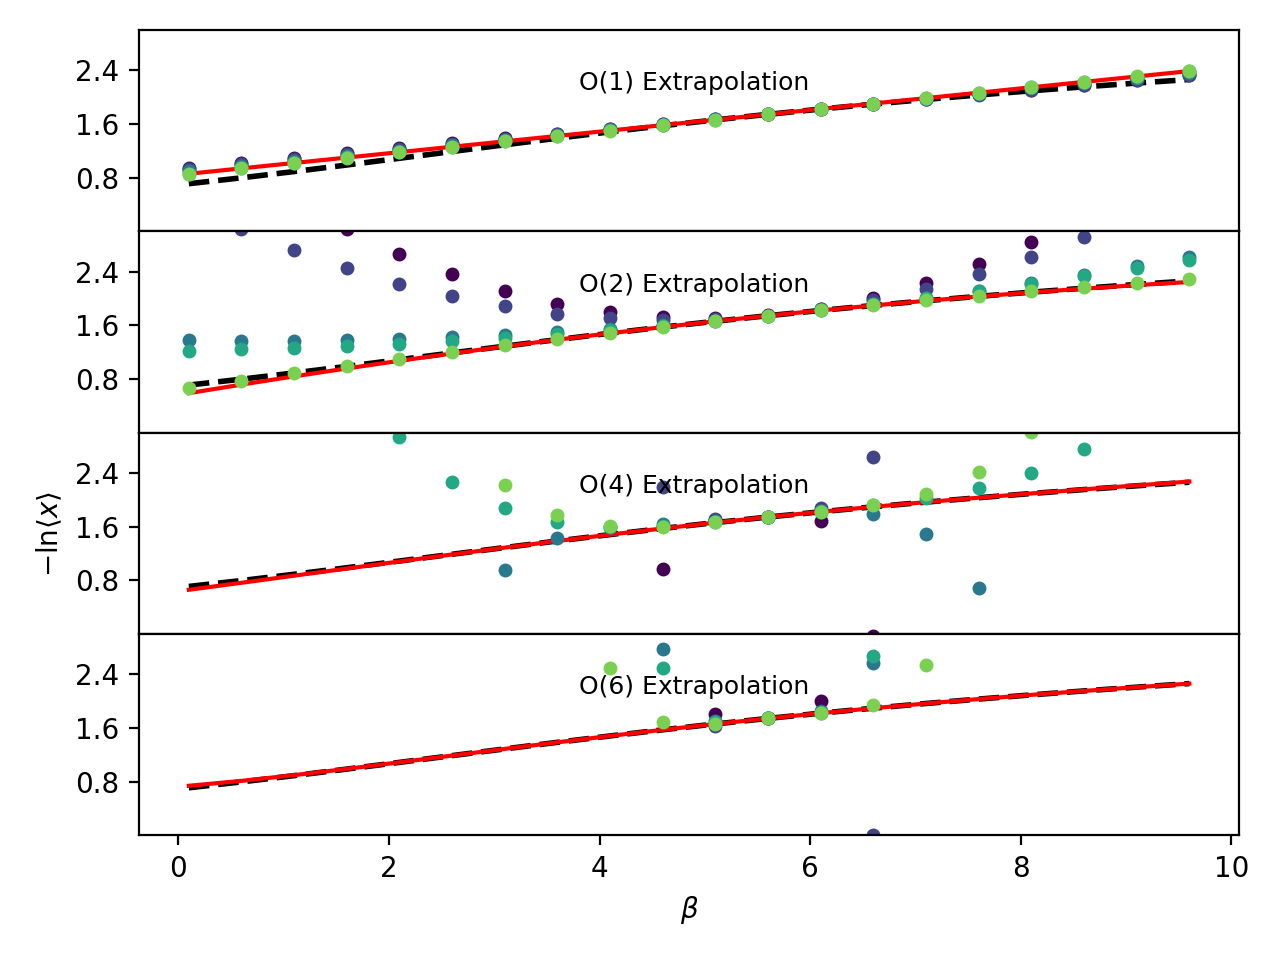

True extrapolation coefficients: [ 1.74377054e+00  1.61056939e-01 -1.77268660e-02  3.66764737e-04
  2.11140145e-03 -1.53768224e-03  3.99266294e-04]
	 With N_configs =     10: [ 1.74782566e+00  1.45693944e-01  2.33637443e-01 -3.86936541e+00
 -3.34578749e+01  4.13899939e+02  9.80500758e+03]
	 With N_configs =    100: [ 1.74312858e+00  1.47665664e-01  1.62456917e-01  4.73448847e-01
  1.41704026e+01  1.00530300e+02 -2.49921980e+03]
	 With N_configs =   1000: [ 1.74387390e+00  1.54352482e-01  3.17552496e-02 -5.09326666e-01
 -1.12725537e+00 -2.12940374e+01  6.89188191e+02]
	 With N_configs =  10000: [ 1.74398220e+00  1.60689703e-01  2.39521876e-02 -5.31875439e-02
  1.95780277e-01 -7.60270124e+00  5.90225419e+02]
	 With N_configs = 100000: [ 1.74382093e+00  1.61028698e-01 -1.31022188e-02 -4.19460903e-03
  5.61510376e-01 -3.52195040e+00  4.22559191e+01]


In [17]:
#Repeat comparison of results, but for -ln<x> instead of <x>

fig, ax = plt.subplots(len(extOrders), sharex=True, sharey=True)

#nsampvals = np.geomspace(10, len(xdata), num=4, dtype=int)
nsampvals = np.array((10.0*np.ones(5))**np.arange(1,6), dtype=int)
nsampcolors = plt.cm.viridis(np.arange(0.0, 1.0, float(1.0/len(nsampvals))))

#First plot the analytical result
for a in ax:
    a.plot(betavals, -np.log(mIG.avgX(betavals)), 'k--', linewidth=2.0)

#And the infinite sampling results for each extrapolation order
#Must carefully calculate derivatives with Faa di Bruno's formula, then manually do extrapolation
#Again hard-coded and not explicitly part of IGModel class
trueDerivs = np.zeros(np.max(extOrders)+1)
for o in range(np.max(extOrders)+1):
    if o == 0:
        trueDerivs[o] = (-np.log(mIG.avgX(refBeta)))
        continue
    for k in range(1,o+1):
        thisDiffs = np.array([mIG.avgXsym.diff(mIG.b, l).subs({mIG.b:refBeta, mIG.l:1.0}) for l in range(1, o-k+2)])
        trueDerivs[o] += np.math.factorial(k-1)*((-1/mIG.avgX(refBeta))**k)*bell(o, k, thisDiffs)
print('True extrapolation coefficients: %s'%str(trueDerivs))

#Loop to get actual analytical extrapolations based on derivatives
for j, o in enumerate(extOrders):
    trueExtrap = 0.0
    for k in range(o+1):
        trueExtrap += trueDerivs[k]*((betavals-refBeta)**k)/np.math.factorial(k)
    ax[j].plot(betavals, trueExtrap, 'r-')

for i, n in enumerate(nsampvals):
    thisinds = np.random.choice(len(xdata), size=n, replace=False)
    
    #Get parameters for extrapolation model with this data by training it - the parameters are the derivatives
    thisext = extModelLog.train(refBeta, xdata[thisinds], udata[thisinds], saveParams=False)
    print('\t With N_configs = %6i: %s'%(n, str(thisext.flatten()))) #Have to flatten because observable is 1-D
    for j, o in enumerate(extOrders):
        dataExtrap = extModelLog.predict(betavals, params=thisext, order=o)
        ax[j].plot(betavals, dataExtrap, 'o', markersize=4, color=nsampcolors[i], label='N=%i'%n)

ax[2].set_ylabel(r'$-\mathrm{ln} \langle x \rangle$')
ax[-1].set_xlabel(r'$\beta$')

for j, o in enumerate(extOrders):
    ax[j].annotate('O(%i) Extrapolation'%(o), xy=(0.4, 0.7), xycoords='axes fraction', fontsize=9)

ax[0].set_ylim((0.0, 3.0))
ax[-1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=4, prune='both'))

fig.tight_layout()
fig.subplots_adjust(hspace=0.0)

plt.show()


### Case 4: Observable is the negative logarithm of an average with explicit temperature dependence

At this point it should be clear that this is possible and only slightly more annoying to implement. Unfortunately, this is a relatively common case - any time you have computed a free energy change, such as solvation, at one temperature and want to extrapolate it to another temperature. We have to modify both `calcDerivFuncs` and `calcDerivVals` the same way we did for Case 2. Now we just also need to add in the chain rule trick from Case 3.

As a quick tutorial to inheritance of classes in python, we do this by inheriting from `ExtrapModelDependent` that we created earlier. By doing this, we only need to modify `calcDerivVals` since `calcDerivFuncs` will already be updated to reflect temperature dependence of the symbolic derivatives. This basic feature of python is why it's so quick and easy to customize the libExtrap library however you want. You still get the power of other methods in the class as long as the outputs from the methods you modify are what is expected by the class.

In [18]:
class LogAvgExtrapModelDependent(ExtrapModelDependent):
    """Class to hold information about an extrapolation that is dependent on the extrapolation variable and
    involves the negative logarithm of an average.
    """

    def calcDerivVals(self, refB, x, U):
        """Calculates specific derivative values at B with data x and U up to max order.
        Returns these derivatives.
        """
        if x.shape[0] != U.shape[0]:
            print('First observable dimension (%i) and size of potential energy array (%i) don\'t match!'%(x.shape[0], U.shape[0]))
            return
        
        avgUfunc, avgXUfunc = buildAvgFuncsDependent(x, U, self.maxOrder) #Change this line to use dependent function
        derivVals = np.zeros((self.maxOrder+1, x.shape[2])) #And change this line because x data is of different shape
        for o in range(self.maxOrder+1):
            if o == 0:
                derivVals[o] = (-np.log(avgXUfunc(0,0))) #First index is derivative of function, next is power on U
                continue
            for k in range(1,o+1):
                #Get the derivatives of the average quantity
                thisDiffs = np.array([self.derivF[l](avgUfunc, avgXUfunc) for l in range(1, o-k+2)])
                #Loop to apply the chain rule to each element of the observable array
                for l in range(x.shape[2]):
                    derivVals[o,l] += np.math.factorial(k-1)*((-1/avgXUfunc(0,0)[l])**k)*bell(o, k, thisDiffs[:,l])
            
        return derivVals


In [19]:
#Create and train extrapolation model
extModelLogDepend = LogAvgExtrapModelDependent(maxOrder=extOrders[-1], refB=refBeta, xData=xdataDepend, uData=udata)

#Note that we handled the -log calculation in the definition of the derivatives (even at zeroth order).
#This means we want to just pass data, not the -log of the data.

#Check the parameters
print(extModelLogDepend.params)
print('\n')

#Finally, look at predictions
print(extModelLogDepend.predict(betavals[:4], order=2))
print('\n')

#And bootstrapped uncertainties
print(extModelLogDepend.bootstrap(betavals[:4], order=2))


[[ 2.10543310e-02]
 [-1.75427307e-02]
 [ 1.87855363e-02]
 [-1.55830886e-02]
 [ 5.67618925e-01]
 [-3.52088468e+00]
 [ 4.63795997e+01]]


[[0.40167059]
 [0.34358719]
 [0.29020017]
 [0.24150954]]


[[0.10393229]
 [0.08591531]
 [0.06961386]
 [0.05502793]]


<IPython.core.display.Javascript object>


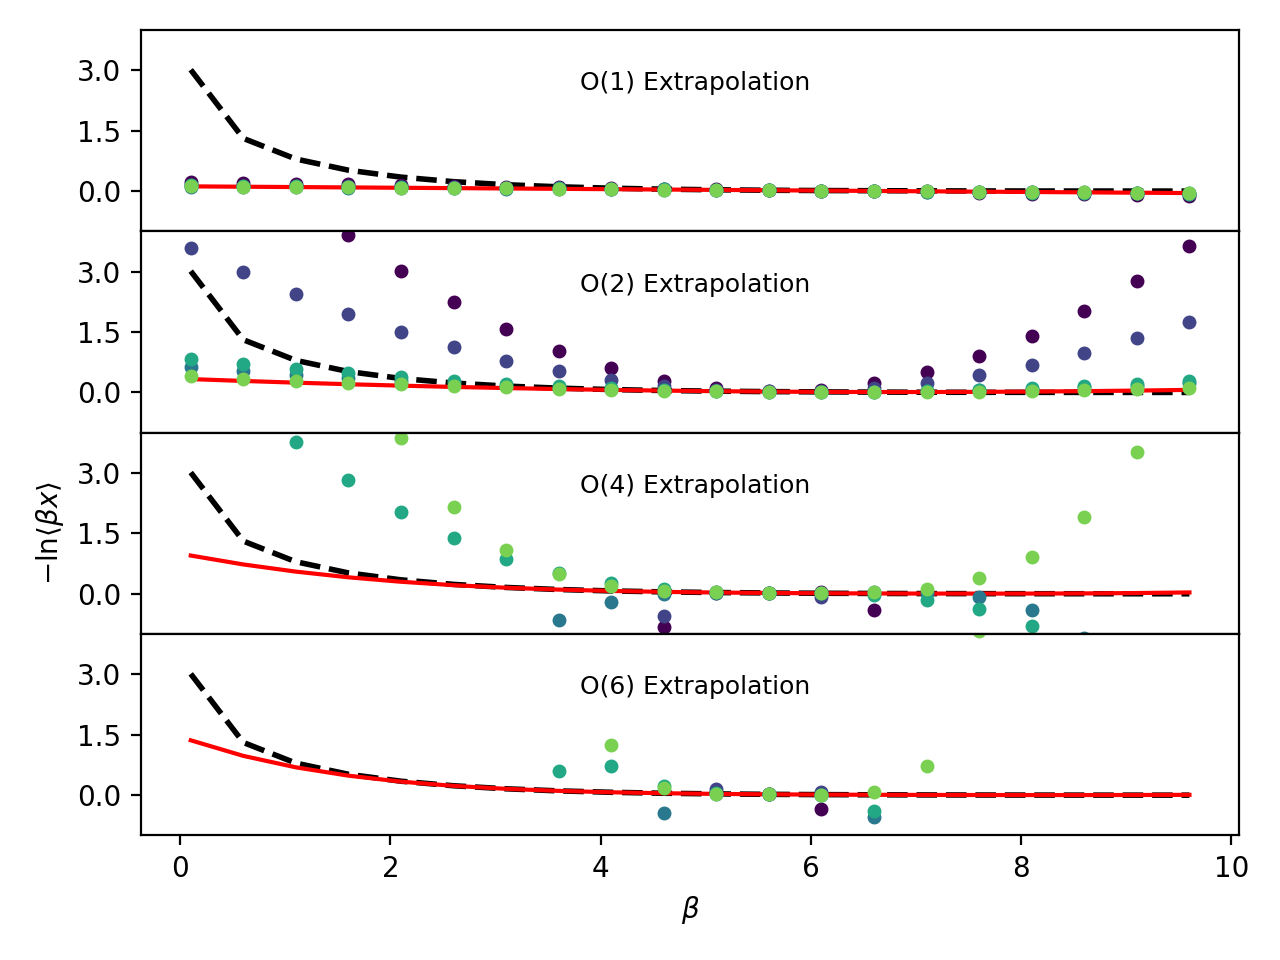

True extrapolation coefficients: [ 0.02100394 -0.01751449  0.01416089 -0.01102172  0.00821238 -0.00589552
  0.00429019]
	 With N_configs =     10: [ 2.64836924e-02 -3.47937174e-02  4.68389879e-01  1.49808408e+00
 -2.10034982e+01 -8.54181223e+02 -7.93821261e+03]
	 With N_configs =    100: [ 2.42221606e-02 -2.24697119e-02  2.27851027e-01 -2.55456597e+00
 -2.72093272e+01  1.40566004e+02  6.08410462e+03]
	 With N_configs =   1000: [ 2.16953075e-02 -1.62178120e-02  3.38862455e-02  2.36440305e-01
 -6.80171014e-01 -9.10298453e+00 -3.57256322e+02]
	 With N_configs =  10000: [ 2.09770896e-02 -2.26953302e-02  4.57598356e-02 -3.01565293e-01
 -8.17906231e-02 -2.83368135e+01 -8.39117139e+01]
	 With N_configs = 100000: [ 2.10543310e-02 -1.75427307e-02  1.87855363e-02 -1.55830924e-02
  5.67618195e-01 -3.51602258e+00  5.22554541e+01]


In [21]:
#Repeat comparison of results, but for -ln<B*x>, the most complicated case

fig, ax = plt.subplots(len(extOrders), sharex=True, sharey=True)

#nsampvals = np.geomspace(10, len(xdata), num=4, dtype=int)
nsampvals = np.array((10.0*np.ones(5))**np.arange(1,6), dtype=int)
nsampcolors = plt.cm.viridis(np.arange(0.0, 1.0, float(1.0/len(nsampvals))))

#First plot the analytical result
for a in ax:
    a.plot(betavals, -np.log(betavals*mIG.avgX(betavals)), 'k--', linewidth=2.0)

#And the infinite sampling results for each extrapolation order
#Must carefully calculate derivatives with Faa di Bruno's formula, then manually do extrapolation
#Again hard-coded for just -ln<B*x> and not explicitly part of IGModel class
trueDerivs = np.zeros(np.max(extOrders)+1)
for o in range(np.max(extOrders)+1):
    if o == 0:
        trueDerivs[o] = -np.log(refBeta*(mIG.avgX(refBeta)))
        continue
    trueDerivs[o] += np.math.factorial(o-1)*((-1.0/refBeta)**o) 
    for k in range(1,o+1):
        thisDiffs = np.array([mIG.avgXsym.diff(mIG.b, l).subs({mIG.b:refBeta, mIG.l:1.0}) for l in range(1, o-k+2)])
        trueDerivs[o] += np.math.factorial(k-1)*((-1/mIG.avgX(refBeta))**k)*bell(o, k, thisDiffs)
print('True extrapolation coefficients: %s'%str(trueDerivs))

#Loop to get actual analytical extrapolations based on derivatives
for j, o in enumerate(extOrders):
    trueExtrap = 0.0
    for k in range(o+1):
        trueExtrap += trueDerivs[k]*((betavals-refBeta)**k)/np.math.factorial(k)
    ax[j].plot(betavals, trueExtrap, 'r-')

for i, n in enumerate(nsampvals):
    thisinds = np.random.choice(len(xdata), size=n, replace=False)
    
    #Get parameters for extrapolation model with this data by training it - the parameters are the derivatives
    thisext = extModelLogDepend.train(refBeta, xdataDepend[thisinds], udata[thisinds], saveParams=False)
    print('\t With N_configs = %6i: %s'%(n, str(thisext.flatten()))) #Have to flatten because observable is 1-D
    for j, o in enumerate(extOrders):
        dataExtrap = extModelLogDepend.predict(betavals, params=thisext, order=o)
        ax[j].plot(betavals, dataExtrap, 'o', markersize=4, color=nsampcolors[i], label='N=%i'%n)

ax[2].set_ylabel(r'$-\mathrm{ln} \langle \beta x \rangle$')
ax[-1].set_xlabel(r'$\beta$')

for j, o in enumerate(extOrders):
    ax[j].annotate('O(%i) Extrapolation'%(o), xy=(0.4, 0.7), xycoords='axes fraction', fontsize=9)

ax[0].set_ylim((-1.0, 4.0))
ax[-1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=4, prune='both'))

fig.tight_layout()
fig.subplots_adjust(hspace=0.0)

plt.show()


<IPython.core.display.Javascript object>


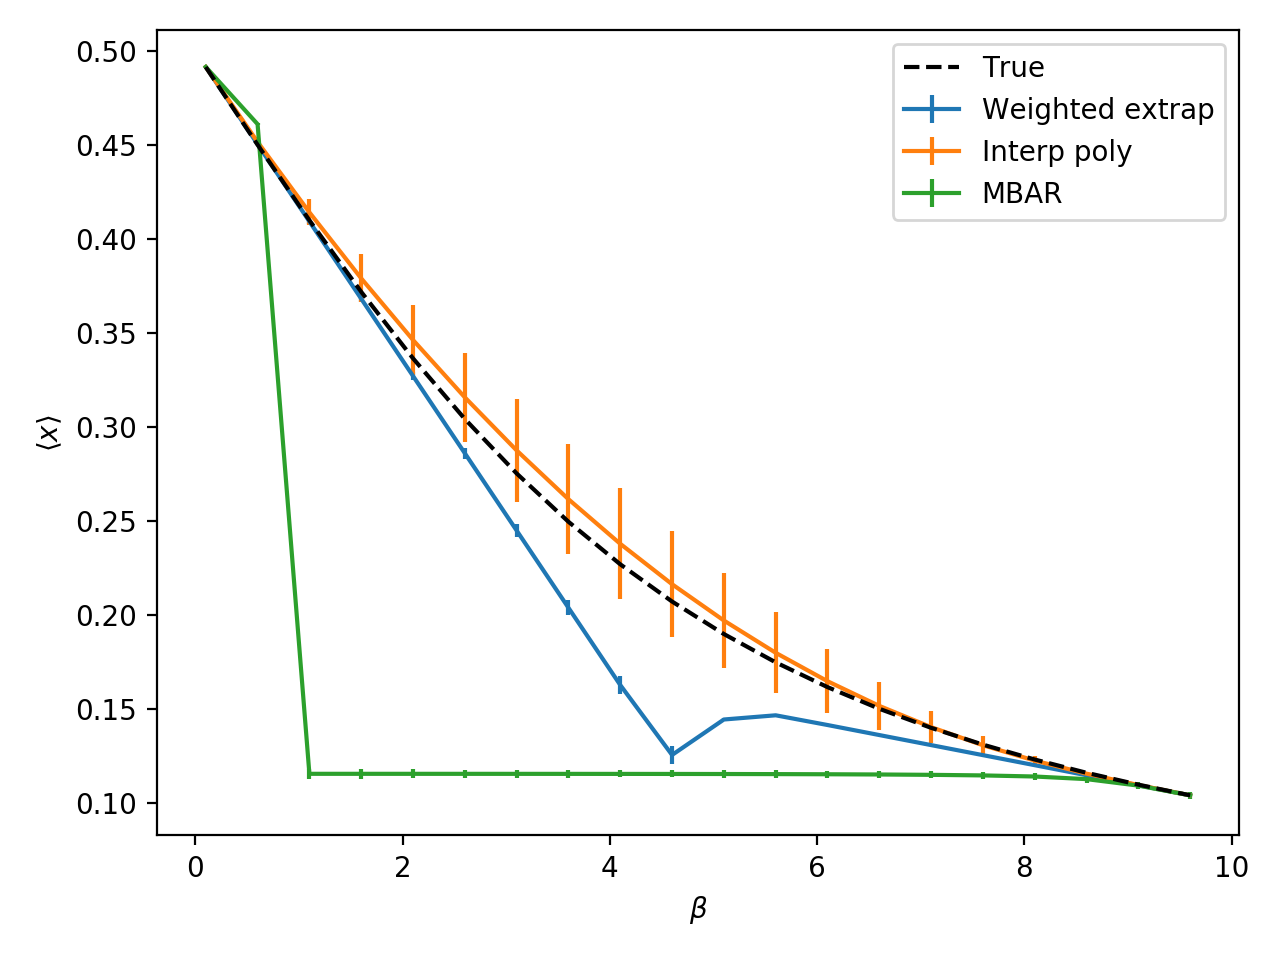

In [10]:
#Here we will compare interpolation strategies, using the case of only two input points
#Recursive implementation of interpolation will come later

iFig, iAx = plt.subplots()

xdata1, udata1 = mIG.genData(betavals[0], nConfigs=10000)
xdata2, udata2 = mIG.genData(betavals[-1], nConfigs=10000)
xData = np.array([xdata1, xdata2])
uData = np.array([udata1, udata2])

#Check weighted extrapolation, polynomial interpolation, and MBAR (really just BAR because have 2 points)
iModelExtW = ExtrapWeightedModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)
iModelPoly = InterpModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)
with np.errstate(invalid='ignore'):
    iModelMBAR = MBARModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)

#And plot results, using bootstrapped error on same dataset for each type of model
iAx.errorbar(betavals, iModelExtW.predict(betavals, order=1)[:,0], 
             yerr=iModelExtW.bootstrap(betavals, order=1)[:,0], label='Weighted extrap')
iAx.errorbar(betavals, iModelPoly.predict(betavals, order=1)[:,0], 
             yerr=iModelPoly.bootstrap(betavals, order=1)[:,0], label='Interp poly')
with np.errstate(invalid='ignore'):
    iAx.errorbar(betavals, iModelMBAR.predict(betavals, order=1)[:,0], 
                 yerr=iModelMBAR.bootstrap(betavals, order=1)[:,0], label='MBAR')
iAx.plot(betavals, mIG.avgX(betavals), 'k--', label='True', zorder=3)

iAx.set_xlabel(r'$\beta$')
iAx.set_ylabel(r'$\langle x \rangle$')
iAx.legend()

iFig.tight_layout()

plt.show()


The above compares weighted extrapolation (using the Minkowski-like distance that Nate proposed), polynomial interpolation, and MBAR (really just BAR because using only 2 points). Each method is used to interpolated between the two extreme values of beta. In all cases, the same data from the two edge points is used, making use of only derivatives up to 1st order for weighted extrapolation and interpolation. The error bars are one standard deviation from bootstrap resampling of the predictions of each model. True values are represented by the black dashed line. Using additional data points within the region and performing interpolation will result in qualitatively similar results for each subregion, even if all data points are used to inform the MBAR or interpolating polynomial models.

We don't really expect MBAR to do any better than perturbation because it is using the MBAR weights between states to reweight the perturbation theory estimates. As such, we can see that it is "sticky" in that it tries to keep using a single point until it suddenly jumps to the next one. This is a symptom of the fact that the perturbation theory estimates themselves plateau. Such plateaus represent poor overlap, resulting in large free energy differences and MBAR weights that essentially act as step functions (i.e. you just pick whichever point has lower free energy over the entire interval). Extrapolation is almost always better, but note that it's predictions vary more with sampling, especially if you go to higher order.


Interpolating from points 0.100000 and 9.600000
Recursion depth on this branch: 0
Maximum bootstrapped error within interval: 0.174825
Selected new extrapolation point: 4.753061

Interpolating from points 0.100000 and 4.753061
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.027707
Selected new extrapolation point: 2.284090

Interpolating from points 0.100000 and 2.284090
Recursion depth on this branch: 2
Maximum bootstrapped error within interval: 0.004449
No additional extrapolation points necessary on this interval.

Interpolating from points 2.284090 and 4.753061
Recursion depth on this branch: 2
Maximum bootstrapped error within interval: 0.005042
No additional extrapolation points necessary on this interval.

Interpolating from points 4.753061 and 9.600000
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.013347
No additional extrapolation points necessary on this interval.


<IPython.core.display.Javascript object>


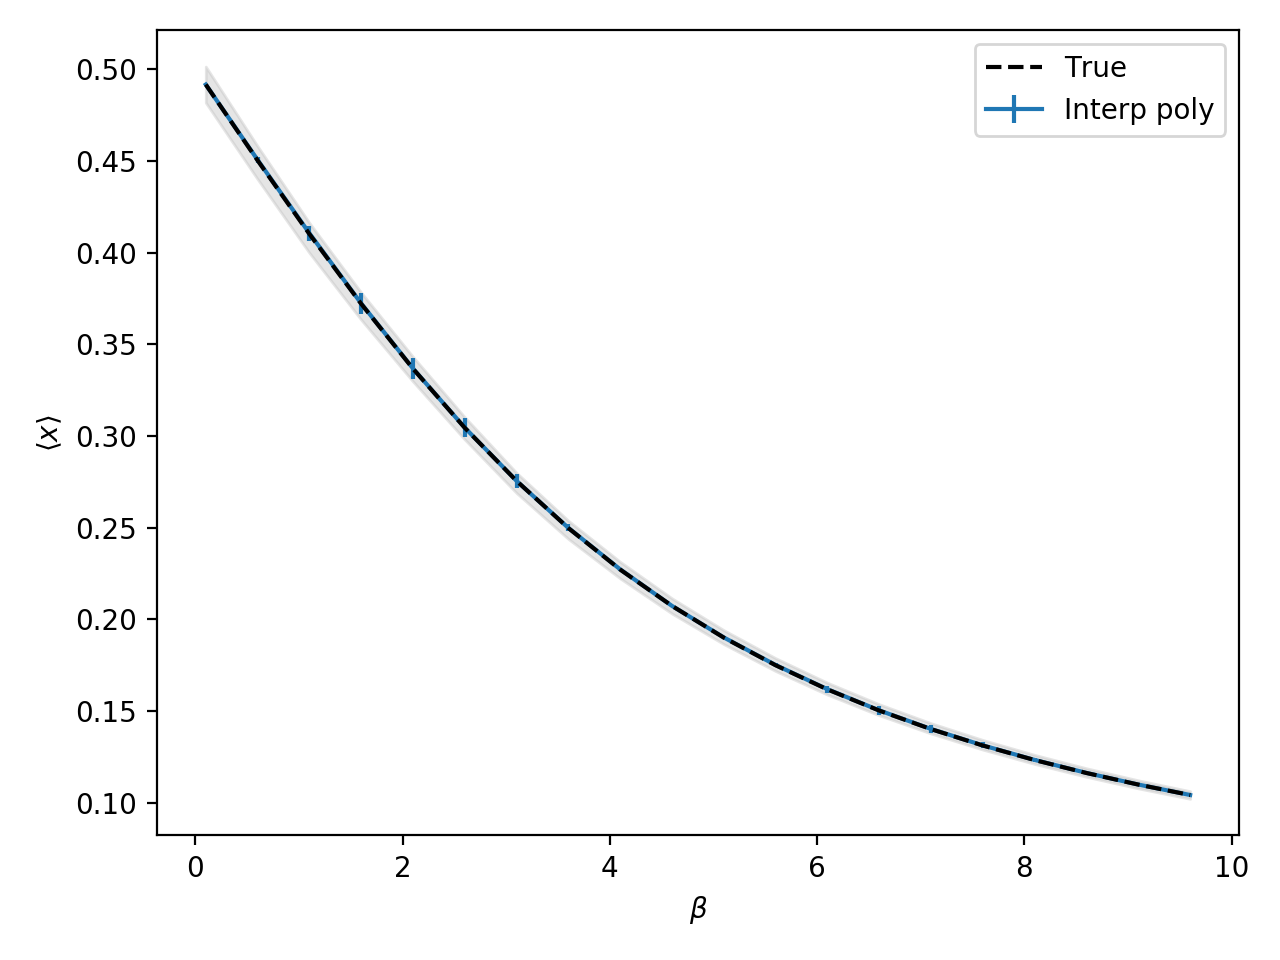

In [12]:
#Now want to look at recursive interpolation procedure
#Will only use polynomial interpolation model here

#Will perform extrapolation multiple times to get uncertainties and statistics
nRepeats = 10

iModelPoly = InterpModel(maxOrder=2)
intPstats = np.zeros((nRepeats, len(betavals)))
for i in range(nRepeats-1):
    intPpiecewise = RecursiveInterp(iModelPoly, [betavals[0], betavals[-1]], maxOrder=1, errTol=0.02)
    intPpiecewise.recursiveTrain(betavals[0], betavals[-1])
    intPstats[i,:] = intPpiecewise.predict(betavals)[:,0]
#Do last repeat with verbose output - also gives us a function to work with
intPpiecewise = RecursiveInterp(iModelPoly, [betavals[0], betavals[-1]], maxOrder=1, errTol=0.02)
intPpiecewise.recursiveTrain(betavals[0], betavals[-1], verbose=True)
intPstats[-1,:] = intPpiecewise.predict(betavals)[:,0]

#Plot to compare against true average versus beta for ideal gas model
interpFig, interpAx = plt.subplots()

interpAx.errorbar(betavals, np.average(intPstats, axis=0),
                  yerr=np.std(intPstats, ddof=1, axis=0), label='Interp poly')
#Compare resampling statistics to error from bootstrapping for LAST repeat
#Bootstrap error is gauranteed to be within errTol absolute relative error, so just shade around curve
predictedVals = intPpiecewise.predict(betavals)[:,0]
interpAx.fill_between(betavals, predictedVals-(0.02*abs(predictedVals)), predictedVals+(0.02*abs(predictedVals)),
                      color='silver', alpha=0.4)
interpAx.plot(betavals, mIG.avgX(betavals), 'k--', label='True', zorder=3)

interpAx.legend()

interpAx.set_ylabel(r'$\langle x \rangle$')
interpAx.set_xlabel(r'$\beta$')

interpFig.tight_layout()

plt.show()


The above cell runs an automated algorithm for performing interpolation recursively. In the above example, polynomial interpolation is used. This is recommended, but the algorithm may also use weighted extrapolation or MBAR. In the figure, the true observable is shown as the dotted black line. The blue line is the average over a number of runs of the recursive algorithm, with the error bars being the standard deviation over those runs. The gray shaded region represents data within the specified absolute relative error tolerance for bootstrapping over the last run of the recursive interpolation procedure.

A sketch of the recursive algorithm is as follows:

1. Perform interpolation between edge points
    * Only uses up to maximum desired order of derivative information. In the simple ideal gas model, it requires prohibitive amounts of sampling to get good accuracy of derivatives above order 2. If using polynomial interpolation, 2nd derivatives will give us order 5 polynomials. In practice, this probably isn't necessary, so settling for the much more accurate 3rd order interpolating polynomials, which only make use of 1st derivatives.
    * Needs input data at each edge point or must modify getData method in the RecursiveInterp class to read in data or perform simulations. As a default, this class just uses the toy ideal gas model to generate data.
  
  
2. Calculate bootstrapped uncertainty over whole interval
    * The region between the edge points is gridded up with the interpolation model used to predict the value at each point. This procedure is bootstrapped by resampling the data to get the standard deviation of each predicted value at each grid point. The absolute relative error is defined as $\frac{\sigma_x}{|x|}$. The maximum relative error over all grid points and observable elements (if the observable is a vector) is found and compared to the desired tolerance. 
  
  
3. Check if maximum uncertainty is within tolerance
    * If the maximum absolute relative error within the region is lower than the tolerance, then no new simulations are needed. If it is larger than the tolerance, a new state-point is selected where the absolute relative error is a maximum.
  
  
4. Add state point if necessary and recurse
    * If the tolerance is not met, a state point is added as described above. The algorithm returns to step one for each subinterval created, with new data only generated at the new point.


<IPython.core.display.Javascript object>


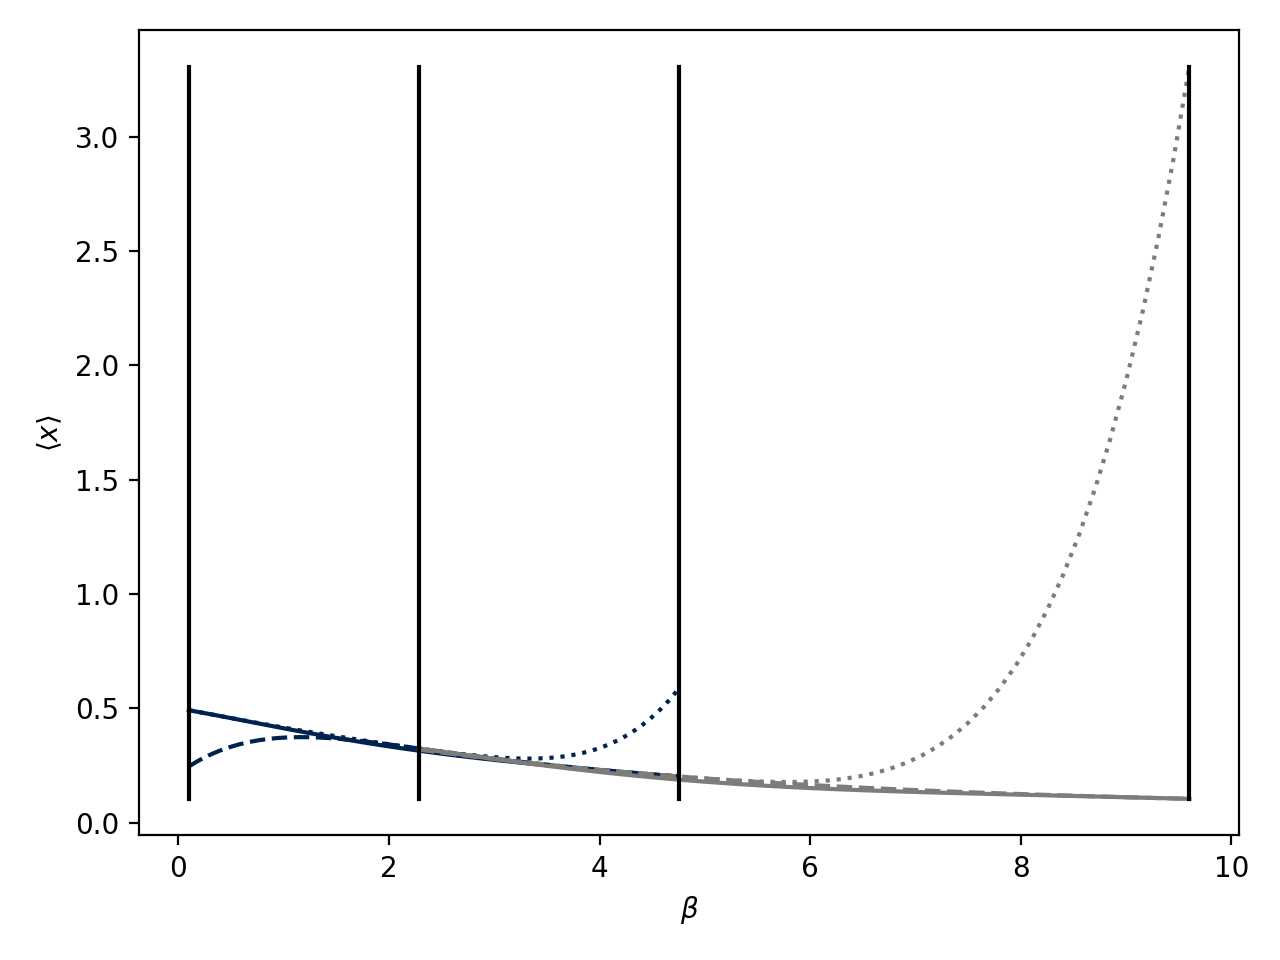

Interval with edges [0.1        2.28408996 4.75306122] (indices [0 1 2]):
	P-values between regions:
[[0.20261723]
 [0.21356302]
 [0.25390162]
 [0.40561744]
 [0.90285721]
 [0.61827623]]
	P-values for full and 1 :
[[0.971148  ]
 [0.93901702]
 [0.87318853]
 [0.54748377]
 [0.423042  ]
 [0.40089801]]
	P-values for full and 2 :
[[0.20260247]
 [0.21324873]
 [0.24729428]
 [0.28936908]
 [0.33255309]
 [0.37352694]]
Interval with edges [2.28408996 4.75306122 9.6       ] (indices [1 2 3]):
	P-values between regions:
[[0.55724109]
 [0.34486621]
 [0.24394233]
 [0.21705272]
 [0.21382074]
 [0.21650794]]
	P-values for full and 1 :
[[0.41269103]
 [0.35983951]
 [0.31061411]
 [0.271389  ]
 [0.24769957]
 [0.23573654]]
	P-values for full and 2 :
[[0.84342914]
 [0.73069176]
 [0.61820898]
 [0.53470667]
 [0.47771195]
 [0.43920437]]


In [13]:
#Can also check for consistency of local curvature rather than specifying the error tolerance
#Not implemented as an "optimization" rule in the recursive interpolation procedure
#But do have function to do statistical and visual check

#Using the model we just trained above, so must run cell above before this one
checkPvals = intPpiecewise.checkPolynomialConsistency(doPlot=True)


In the above plot, interpolating polynomials are shown for sliding windows of three state points used in the recursive interpolation model. Colors change for each window. Within a window (same color) the interpolating polynomial for the lower subregion is shown with a dotted line, that for the upper subregion with a dashed line, and the whole window region using the two outermost edge points with a solid line. Outside of the region they were fitted over, the polynomials show large deviations from the true values. For interpolation, however, the polynomials all overlap quite well. By construction, the piecewise function created by the recursive procedure is continuous in both its value and first derivative at all points in the entire interval. Using higher order derivative information would result in continuity in even higher derivatives, but likely even more divergent behavior outside of the interpolated range.

The point of the above consistency check is to see if the local polynomials agree within each sliding window. If they do, then that means the local curvature is the same over that region and is captured by the order of polynomial that is fit there. To this end, the polynomial coefficients are also boostrapped and, assuming Normal distributions, p-values are computed for the null hypothesis that the coefficients for each set of sub-regions and the full region within a window are the same. Since we want the polynomials to be the same, we don't want small p-values, so the test is of limited usefulness as larger p-values don't necessarily imply greater similarity. A better statistical test is thus needed. However, the visualization provides a quick visual check/rule of thumb to gauge the consistency of the local curvature and thus convergence of the algorithm. This is similar to the idea of generating overlapping distributions for umbrella sampling.

The analysis described above is VERY similar to leave-one-out analysis for Gaussian process regression. In other words, you could add a point where the error was the largest. You could then compare the mean predicted functions with and without the newly-sampled point. If the functions are the same within error, then you're done. If not, then you likely need to add more points. This focuses on local consistency of the function and could be performed for all intervals similar to what's described for the polynomials. This is in contrast to the idea of adding points until the uncertainty meets a given tolerance. Eventualy we will need to pick one criteria for the recursive algorithm to use, but we can always use the other to check quality of the result, as done above.

<IPython.core.display.Javascript object>


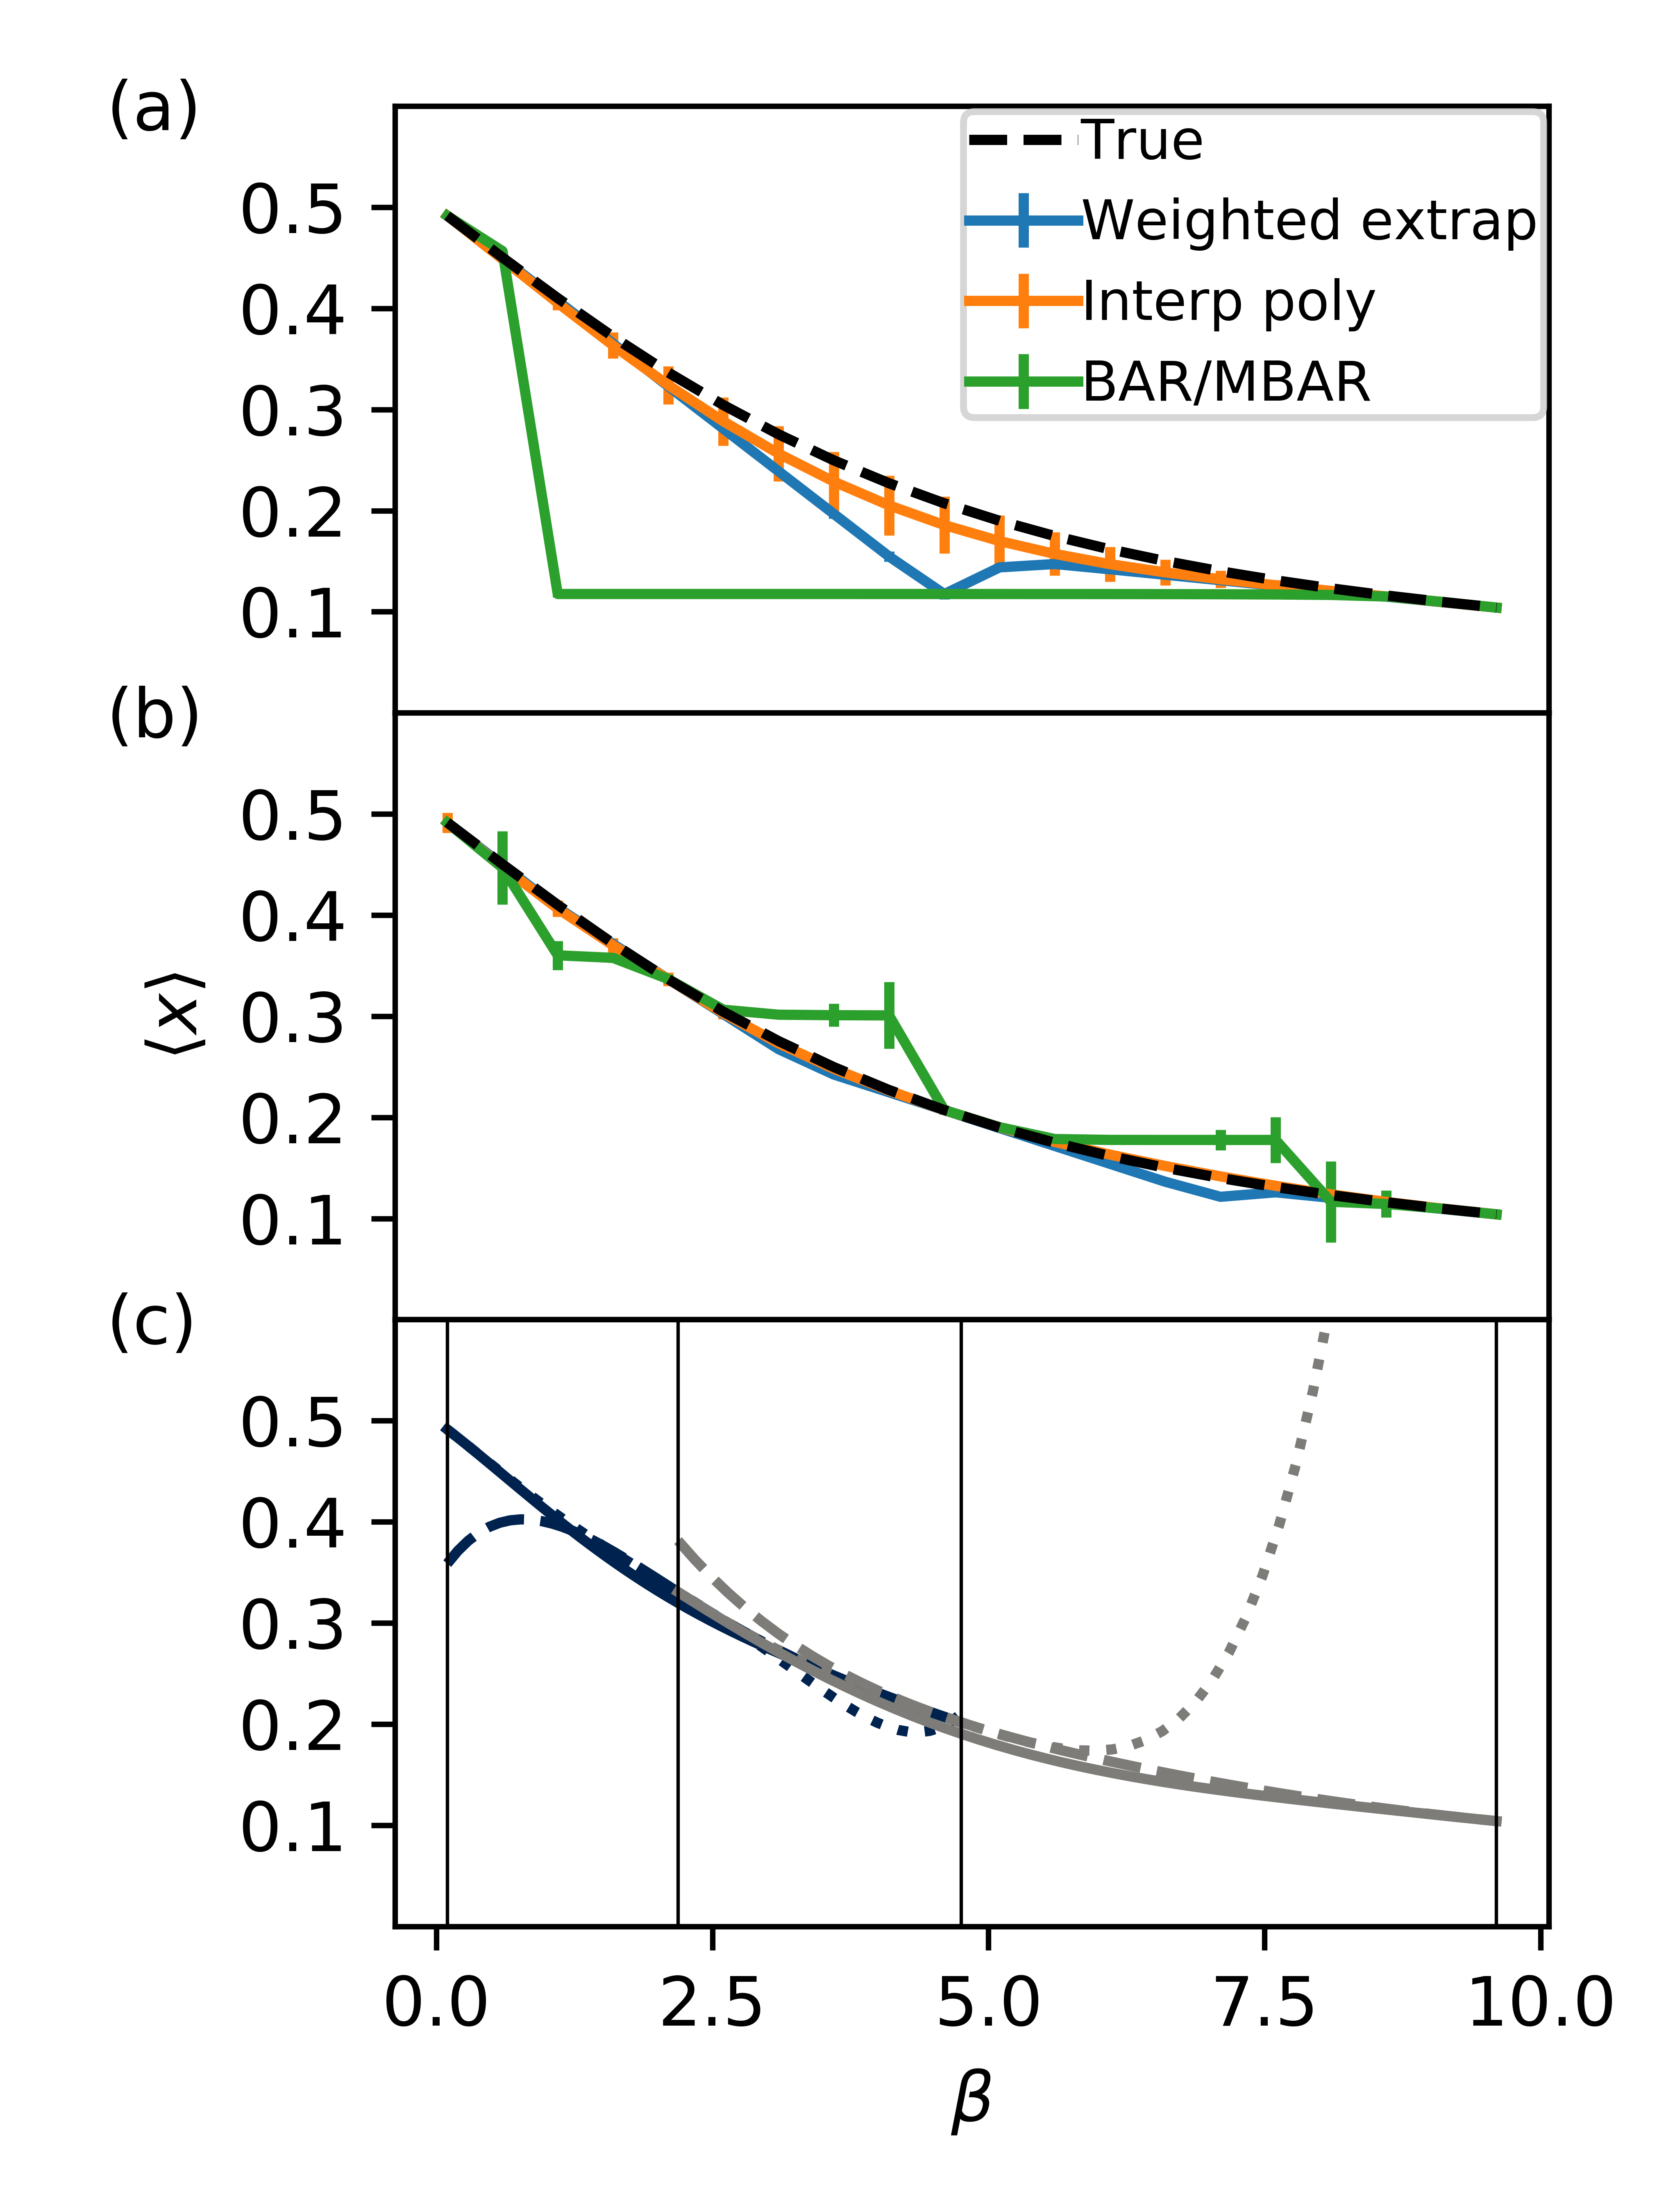

In [13]:
#Create a nice figure for the paper

#Here we will compare interpolation strategies, using the case of only two input points
#Recursive implementation of interpolation will come later

niceFig, niceAx = plt.subplots(3, sharex=True, sharey=True, figsize=(3.37, 4.5), dpi=600)

xdata1, udata1 = mIG.genData(betavals[0], nConfigs=10000)
xdata2, udata2 = mIG.genData(betavals[-1], nConfigs=10000)
xData = np.array([xdata1, xdata2])
uData = np.array([udata1, udata2])

#Check weighted extrapolation, polynomial interpolation, and MBAR (really just BAR because have 2 points)
iModelExtW = ExtrapWeightedModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)
iModelPoly = InterpModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)
with np.errstate(invalid='ignore'):
    iModelMBAR = MBARModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)

#And plot results, using bootstrapped error on same dataset for each type of model
niceAx[0].errorbar(betavals, iModelExtW.predict(betavals, order=1)[:,0], 
                   yerr=iModelExtW.bootstrap(betavals, order=1)[:,0], label='Weighted extrap')
niceAx[0].errorbar(betavals, iModelPoly.predict(betavals, order=1)[:,0], 
                   yerr=iModelPoly.bootstrap(betavals, order=1)[:,0], label='Interp poly')
with np.errstate(invalid='ignore'):
    niceAx[0].errorbar(betavals, iModelMBAR.predict(betavals, order=1)[:,0], 
                       yerr=iModelMBAR.bootstrap(betavals, order=1)[:,0], label='BAR/MBAR')
niceAx[0].plot(betavals, mIG.avgX(betavals), 'k--', label='True', zorder=3)

#niceAx[0].set_ylabel(r'$\langle x \rangle$', fontsize=10)
niceAx[0].legend(fontsize=8, handletextpad=0.05, borderpad=0.1, borderaxespad=0.1)

#Do recursive interpolation with polynomial
intPpiecewise = RecursiveInterp(iModelPoly, [betavals[0], betavals[-1]], maxOrder=1, errTol=0.02)
intPpiecewise.recursiveTrain(betavals[0], betavals[-1])

#Train weighted extrapolation and MBAR using same edges and same data
weightedPredictVals = np.zeros(len(betavals))
weightedPredictValsErr = np.zeros(len(betavals))
for i in range(1, intPpiecewise.edgeB.shape[0]):
    thisBvalsInds = np.arange(len(betavals))[(betavals>=intPpiecewise.edgeB[i-1])*(betavals<=intPpiecewise.edgeB[i])]
    wParams = iModelExtW.train(intPpiecewise.edgeB[i-1:i+1], 
                               np.array(intPpiecewise.xData[i-1:i+1]), 
                               np.array(intPpiecewise.uData[i-1:i+1]))
    weightedPredictVals[thisBvalsInds] = iModelExtW.predict(betavals[thisBvalsInds], order=1)[:,0]
    weightedPredictValsErr[thisBvalsInds] = iModelExtW.bootstrap(betavals[thisBvalsInds], order=1)[:,0]
with np.errstate(invalid='ignore'):
    iModelMBAR = MBARModel(refB=intPpiecewise.edgeB, 
                           xData=np.array(intPpiecewise.xData), 
                           uData=np.array(intPpiecewise.uData), maxOrder=2)

niceAx[1].errorbar(betavals, weightedPredictVals, yerr=weightedPredictValsErr, label='Weighted extrap')
predictedVals = intPpiecewise.predict(betavals)[:,0]
niceAx[1].errorbar(betavals, predictedVals, yerr=0.02*abs(predictedVals), label='Interp poly')
with np.errstate(invalid='ignore'):
    niceAx[1].errorbar(betavals, iModelMBAR.predict(betavals, order=1)[:,0], 
                       yerr=iModelMBAR.bootstrap(betavals, order=1)[:,0], label='BAR/MBAR')
niceAx[1].plot(betavals, mIG.avgX(betavals), 'k--', label='True', zorder=3)
niceAx[1].set_ylabel(r'$\langle x \rangle$', fontsize=10)
#niceAx[1].legend(fontsize=8, handletextpad=0.1, borderpad=0.1, borderaxespad=0.2)

#Finally, plot consistency check for piecewise interpolating polynomial
#Taking code from checkPolynomialConsistency
#Need to subdivide the full interval into pairs of neighboring intervals
#Easiest way is to take state point edge values in sliding sets of three
allInds = np.arange(intPpiecewise.edgeB.shape[0])
nrows = allInds.size - 3 + 1
n = allInds.strides[0]
edgeSets = np.lib.stride_tricks.as_strided(allInds, shape=(nrows,3), strides=(n,n))

#Before loop, set up plot if wanted
pColors = plt.cm.cividis(np.arange(len(edgeSets))/float(len(edgeSets)))
plotYmin = 1E+10
plotYmax = -1E+10

#Loop over sets of three edges
for i, aset in enumerate(edgeSets):
    #Start with regions we already have coefficients for
    reg1Coeffs = intPpiecewise.modelParams[aset[0]]
    reg1Err = intPpiecewise.modelParamErrs[aset[0]]
    reg2Coeffs = intPpiecewise.modelParams[aset[1]]
    reg2Err = intPpiecewise.modelParamErrs[aset[1]]
    
    #To check full interval, must retrain model with data
    fullCoeffs = intPpiecewise.model.train(intPpiecewise.edgeB[aset[[0,2]]],
                                           np.array([intPpiecewise.xData[aset[0]], intPpiecewise.xData[aset[2]]]),
                                           np.array([intPpiecewise.uData[aset[0]], intPpiecewise.uData[aset[2]]]),
                                           saveParams=True)
    fullErr = intPpiecewise.model.bootstrap(None)

    plotPoints = np.linspace(intPpiecewise.edgeB[aset[0]], intPpiecewise.edgeB[aset[2]], 50)
    plotFull = np.polynomial.polynomial.polyval(plotPoints, fullCoeffs[:,0])
    plotReg1 = np.polynomial.polynomial.polyval(plotPoints, reg1Coeffs[:,0])
    plotReg2 = np.polynomial.polynomial.polyval(plotPoints, reg2Coeffs[:,0])
    niceAx[2].plot(plotPoints, plotFull, color = pColors[i], linestyle='-')
    niceAx[2].plot(plotPoints, plotReg1, color = pColors[i], linestyle=':')
    niceAx[2].plot(plotPoints, plotReg2, color = pColors[i], linestyle='--')
    allPlotY = np.hstack((plotFull, plotReg1, plotReg2))
    if np.min(allPlotY) < plotYmin:
        plotYmin = np.min(allPlotY)
    if np.max(allPlotY) > plotYmax:
        plotYmax = np.max(allPlotY)

for edge in intPpiecewise.edgeB:
    niceAx[2].plot([edge]*2, [0.0, 0.6], 'k-', linewidth=0.5)

niceAx[2].set_xlabel(r'$\beta$', fontsize=10)
#niceAx[2].set_ylabel(r'$\langle x \rangle$', fontsize=10)

for a in niceAx:
    a.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=6, prune='both'))
    a.tick_params(axis='both', labelsize=10)

niceAx[0].annotate('(a)', xy=(-0.25,0.96), xycoords='axes fraction', fontsize=10)
niceAx[1].annotate('(b)', xy=(-0.25,0.96), xycoords='axes fraction', fontsize=10)
niceAx[2].annotate('(c)', xy=(-0.25,0.96), xycoords='axes fraction', fontsize=10)

niceAx[2].set_ylim((0.0, 0.6))

niceFig.tight_layout()
niceFig.subplots_adjust(hspace=0.0)

plt.show()
